# 2024 Analysis

The new 2024 was published to [the US Forest Service Enchantment's webpage.](https://www.fs.usda.gov/detail/okawen/passes-permits/recreation/?cid=fsbdev3_053607) and I'm excited to take a look.

The columns and data in the Excel spreadsheet looking similar to years 2020-2022, which means there is no **Processing Sequence** or **State** columns. Those columns will be missed because they added extra columns for analysis.

I'll import older spreadsheets for comparative data analysis in addition to the new 2024 data.

## Import Combined Results Spreadsheet

In [2]:
import pandas as pd

# Import the combined_results.csv file
df_all = pd.read_csv(
    "../all/combined_results.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date_1",
        "preferred_entry_date_2",
        "preferred_entry_date_3",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

print(len(df_all))
df_all.head()

182755


,preferred_entry_date_1,preferred_zone_1,preferred_entry_date_2,preferred_zone_2,preferred_entry_date_3,preferred_zone_3,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,year,minimum_acceptable_group_size_1,minimum_acceptable_group_size_2,minimum_acceptable_group_size_3,processing_sequence,state
0,2020-06-26,Colchuck Zone,2020-06-26,Core Enchantment Zone,2020-07-10,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
1,2020-08-01,Core Enchantment Zone,2020-09-12,Core Enchantment Zone,2020-06-21,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
2,2020-09-19,Core Enchantment Zone,2020-09-12,Core Enchantment Zone,2020-09-26,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
3,2020-08-22,Core Enchantment Zone,2020-09-17,Core Enchantment Zone,2020-09-18,Core Enchantment Zone,Unsuccessful,0,1970-01-01,N/A,0,2020,0.0,0.0,0.0,,
4,2020-07-17,Snow Zone,2020-07-24,Colchuck Zone,2020-07-17,Core Enchantment Zone,Awarded,1,2020-07-17,Snow Zone,6,2020,0.0,0.0,0.0,,


### Split the data by year

In [3]:
# Split the data by year
df_2020 = df_all[df_all["year"] == 2020]
df_2021 = df_all[df_all["year"] == 2021]
df_2022 = df_all[df_all["year"] == 2022]
df_2023 = df_all[df_all["year"] == 2023]
df_2024 = df_all[df_all["year"] == 2024]
df = df_2024


## 2024 Application Analysis

### Applications Total by Year

First, I'll comparse the total number of applications received from 2020-2024

Total number of applications in 2024: 42765
Percentage increase in applications from 2023 to 2024: 6.83% (2734)


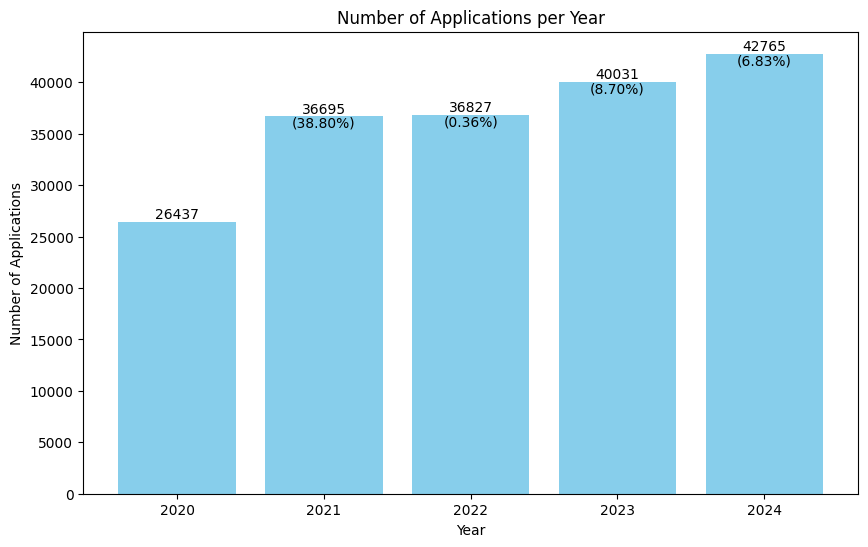

In [4]:
# Get the total number of applications in the dataset

total_applications_2020 = len(df_2020)
total_applications_2021 = len(df_2021)
total_applications_2022 = len(df_2022)
total_applications_2023 = len(df_2023)
total_applications_2024 = len(df_2024)

# Print the result
print(f"Total number of applications in 2024: {total_applications_2024}")


# Calculate the increase in applications from 2023 to 2024 as a percentage
increase_in_applications = (
    (total_applications_2024 - total_applications_2023) / total_applications_2023 * 100
)
increase_in_applications_2021 = (
    (total_applications_2021 - total_applications_2020) / total_applications_2020 * 100
)
increase_in_applications_2022 = (
    (total_applications_2022 - total_applications_2021) / total_applications_2021 * 100
)
increase_in_applications_2023 = (
    (total_applications_2023 - total_applications_2022) / total_applications_2022 * 100
)

# Print the result
print(
    f"Percentage increase in applications from 2023 to 2024: {increase_in_applications:.2f}% ({total_applications_2024 - total_applications_2023})"
)

# Create a bar chart to show the number of applications per year
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    ["2020", "2021", "2022", "2023", "2024"],
    [
        total_applications_2020,
        total_applications_2021,
        total_applications_2022,
        total_applications_2023,
        total_applications_2024,
    ],
    color="skyblue",
)
# Show percent increase from previous year
plt.text(
    0,
    total_applications_2020,
    f"{total_applications_2020}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    1,
    total_applications_2021,
    f"{total_applications_2021}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    1,
    total_applications_2021,
    f"({increase_in_applications_2021:.2f}%)",
    ha="center",
    va="top",
    color="black",
)
plt.text(
    2,
    total_applications_2022,
    f"{total_applications_2022}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    2,
    total_applications_2022,
    f"({increase_in_applications_2022:.2f}%)",
    ha="center",
    va="top",
    color="black",
)
plt.text(
    3,
    total_applications_2023,
    f"{total_applications_2023}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    3,
    total_applications_2023,
    f"({increase_in_applications_2023:.2f}%)",
    ha="center",
    va="top",
    color="black",
)
plt.text(
    4,
    total_applications_2024,
    f"{total_applications_2024}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    4,
    total_applications_2024,
    f"({increase_in_applications:.2f}%)",
    ha="center",
    va="top",
    color="black",
)

plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.title("Number of Applications per Year")
# Save to png
plt.savefig("applications_per_year.png")
plt.show()

The increase in applications has been steady over the last couple of years. The largest jump was from 2020-2021. Application entries rose in 2024 by 6.83% (2,734). Next, I'll chart the years 2020 and 2024 for a tighter range comparison since the forst service started publishing data files online.

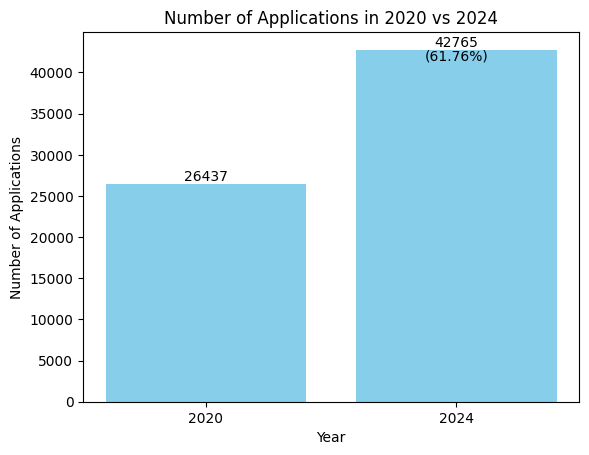

In [5]:
increase_in_applications_2020_2024 = (
    (total_applications_2024 - total_applications_2020) / total_applications_2020 * 100
)
# Create a bar chart showing changes in application numbers comparing 2020 to 2024
plt.figure()
plt.bar(
    ["2020", "2024"],
    [total_applications_2020, total_applications_2024],
    color="skyblue",
)
plt.text(
    0,
    total_applications_2020,
    f"{total_applications_2020}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    1,
    total_applications_2024,
    f"{total_applications_2024}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    1,
    total_applications_2024,
    f"({increase_in_applications_2020_2024:.2f}%)",
    ha="center",
    va="top",
    color="black",
)
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.title("Number of Applications in 2020 vs 2024")
# Save to png
plt.savefig("applications_2020_vs_2024.png")
plt.show()


Application entries for the Enchantments Lottery has risen 61.76% over a four year period since 2020. 

### Awarded Permits by Year

In this section, I'll look at the awarded applications by year and compare the percentages of winning the lottery for each year.

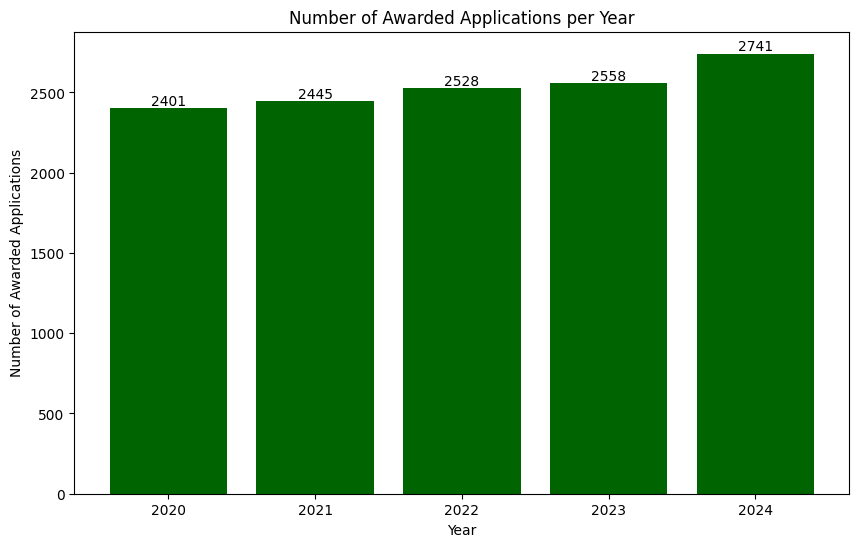

In [6]:
# Get the total number of applications that were awarded by year
# Create a function that takes in a DataFrame and returns the number of awarded applications
def get_awarded_applications(df):
    return len(df[df["awarded_preference"] > 0])


# Get the number of awarded applications for each year
awarded_applications_2020 = get_awarded_applications(df_2020)
awarded_applications_2021 = get_awarded_applications(df_2021)
awarded_applications_2022 = get_awarded_applications(df_2022)
awarded_applications_2023 = get_awarded_applications(df_2023)
awarded_applications_2024 = get_awarded_applications(df_2024)

# Chart the number of awarded applications per year
plt.figure(figsize=(10, 6))
plt.bar(
    ["2020", "2021", "2022", "2023", "2024"],
    [
        awarded_applications_2020,
        awarded_applications_2021,
        awarded_applications_2022,
        awarded_applications_2023,
        awarded_applications_2024,
    ],
    color="darkgreen",
)

# Show the number of awarded applications
plt.text(
    0,
    awarded_applications_2020,
    f"{awarded_applications_2020}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    1,
    awarded_applications_2021,
    f"{awarded_applications_2021}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    2,
    awarded_applications_2022,
    f"{awarded_applications_2022}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    3,
    awarded_applications_2023,
    f"{awarded_applications_2023}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    4,
    awarded_applications_2024,
    f"{awarded_applications_2024}",
    ha="center",
    va="bottom",
    color="black",
)

plt.xlabel("Year")
plt.ylabel("Number of Awarded Applications")
plt.title("Number of Awarded Applications per Year")
# Save to png
plt.savefig("awarded_applications_per_year.png")
plt.show()


The increase in awarded permits in 2024 is due to the walk up lottery being closed an extra data in 2024 (Monday). Those walk-up permits were awarded in the Enchantments Lottery ahead of time. This explains the increase in awarded permits by nearly 200 permits.

In [7]:
# Divide the total number of awarded applications by the total number of applications to get the percentage of awarded applications
percentage_awarded_2020 = awarded_applications_2020 / total_applications_2020 * 100
percentage_awarded_2021 = awarded_applications_2021 / total_applications_2021 * 100
percentage_awarded_2022 = awarded_applications_2022 / total_applications_2022 * 100
percentage_awarded_2023 = awarded_applications_2023 / total_applications_2023 * 100
percentage_awarded_2024 = awarded_applications_2024 / total_applications_2024 * 100

# Print the result
print(f"Percentage of awarded applications in 2024: {percentage_awarded_2024:.2f}%")

# Create a table showing the number of applications, awarded applications, and percentage of awarded applications per year
data = {
    "Year": ["2020", "2021", "2022", "2023", "2024"],
    "Total Applications": [
        total_applications_2020,
        total_applications_2021,
        total_applications_2022,
        total_applications_2023,
        total_applications_2024,
    ],
    "Awarded Applications": [
        awarded_applications_2020,
        awarded_applications_2021,
        awarded_applications_2022,
        awarded_applications_2023,
        awarded_applications_2024,
    ],
    "Percentage Awarded": [
        percentage_awarded_2020,
        percentage_awarded_2021,
        percentage_awarded_2022,
        percentage_awarded_2023,
        percentage_awarded_2024,
    ],
}

df_table = pd.DataFrame(data)

# Convert percentage awarded to percentage format
df_table["Percentage Awarded"] = df_table["Percentage Awarded"].map("{:.2f}%".format)

print(df_table)

Percentage of awarded applications in 2024: 6.41%
   Year  Total Applications  Awarded Applications Percentage Awarded
0  2020               26437                  2401              9.08%
1  2021               36695                  2445              6.66%
2  2022               36827                  2528              6.86%
3  2023               40031                  2558              6.39%
4  2024               42765                  2741              6.41%


The percentage of awarded applications by year has been steady since 2021. It took a steep drop from 2020 to 2021 when applications increase by more than 30%.

### Awarded Permits by Zone

Now, I'll examine the awarded permits by the different zones. In previous years, applicants were able to apply for "stock" (livestock) permits in the Eightmile/Caroline Zone and the Stuart Zone. In 2024, those permits were no longer available so there are only 5 zone options:
- Core Enchantment Zone
- Colchuck Zone
- Snow Zone
- Stuart Zone
- Eightmile/Caroline Zone

In [8]:
# Print the result
print(f"Awarded permits by zone:")

# Filter the 2024 data to only include awarded applications
awarded_2024 = df_2024[df_2024["awarded_preference"] > 0]

pd.crosstab(
    awarded_2024["awarded_entrance_code_name"],
    awarded_2024["results_status"],
    margins=True,
)

Awarded permits by zone:


results_status,Accepted,Declined,No Response,All
awarded_entrance_code_name,,,,
Colchuck Zone,339,6,35,380
Core Enchantment Zone,720,9,61,790
Eightmile/Caroline Zone,278,20,55,353
Snow Zone,593,31,65,689
Stuart Zone,434,24,71,529
All,2364,90,287,2741


Because the Core Enchantment Zone is permitted by PEOPLE, not by GROUP, more permits are awarded for the Core Enchantment Zone than any other zone. The number of permits awarded per day is different depending on the day and zone.

**Enchantments Quota by Zone**

- Core Enchantment Zone: 24 people 
- Colchuck Zone: 3 groups
- Stuart Zone: 4 groups
- Snow Zone: 5 groups
- Eightmile / Caroline Zone: 3 groups

**Enchantments Lottery Quota Tues-Sat**

- Core Enchantment Zone: 16 people 
- Colchuck Zone: 2 groups
- Stuart Zone: 3 groups
- Snow Zone: 4 groups
- Eightmile / Caroline Zone: 2 groups

**Enchantments Lottery Quota Mon-Sun**

- Core Enchantment Zone: 24 people 
- Colchuck Zone: 4 groups
- Stuart Zone: 5 groups
- Snow Zone: 6 groups
- Eightmile / Caroline Zone: 4 groups

This explains a lot of the variation in the awarded permits, in combinatiion with popularity of course.

#### Core Zone

The Core Enchantment Zone is special because permits are awarded by PEOPLE not GROUP. In addition to the permit difference, the Core Enchantment Zone sees way more applications than any other zone. It's even really close.

In [9]:
# Probability you were awarded a permit for the Core Enchantment Zone
probability_core_awarded = (
    len(
        awarded_2024[
            awarded_2024["awarded_entrance_code_name"] == "Core Enchantment Zone"
        ]
    )
    / total_applications_2024
)

awarded_2023 = df_2023[df_2023["awarded_preference"] > 0]

probability_core_awarded_2023 = (
    len(
        awarded_2023[
            awarded_2023["awarded_entrance_code_name"] == "Core Enchantment Zone"
        ]
    )
    / total_applications_2023
)

awarded_2022 = df_2022[df_2022["awarded_preference"] > 0]

probability_core_awarded_2022 = (
    len(
        awarded_2022[
            awarded_2022["awarded_entrance_code_name"] == "Core Enchantment Zone"
        ]
    )
    / total_applications_2022
)

awarded_2021 = df_2021[df_2021["awarded_preference"] > 0]

probability_core_awarded_2021 = (
    len(
        awarded_2021[
            awarded_2021["awarded_entrance_code_name"] == "Core Enchantment Zone"
        ]
    )
    / total_applications_2021
)

awarded_2020 = df_2020[df_2020["awarded_preference"] > 0]

probability_core_awarded_2020 = (
    len(
        awarded_2020[
            awarded_2020["awarded_entrance_code_name"] == "Core Enchantment Zone"
        ]
    )
    / total_applications_2020
)

# Print the result
print(
    f"Probability of getting an awarded permit for the Core Enchantment Zone in 2024: {probability_core_awarded:.2%}"
)

Probability of getting an awarded permit for the Core Enchantment Zone in 2024: 1.85%


/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_11926/985951355.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.2f}%".format(x * 100) for x in plt.gca().get_yticks()])


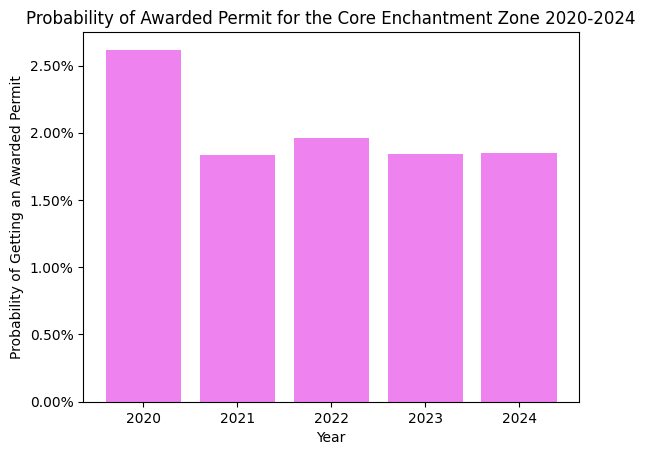

In [10]:
# Create a bar chart showing change in probability of getting a permit for the Core Enchantment Zone from 2020 to 2024
plt.figure()
plt.bar(
    ["2020", "2021", "2022", "2023", "2024"],
    [
        probability_core_awarded_2020,
        probability_core_awarded_2021,
        probability_core_awarded_2022,
        probability_core_awarded_2023,
        probability_core_awarded,
    ],
    color="violet",
)

# Show y-axis as percent out to two decimal places
plt.gca().set_yticklabels(["{:.2f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.xlabel("Year")
plt.ylabel("Probability of Getting an Awarded Permit")
plt.title("Probability of Awarded Permit for the Core Enchantment Zone 2020-2024")
# Save to png
plt.savefig("probability_core_awarded_2020_2024.png")
plt.show()

The above chart shows the probability of winning a Core Enchantment Zone permit through the years. 

### Awarded Permit Given You Applied for Zone

A problem I've always had with how people write about the Enchantments Lottery is a misunderstanding about how the lottery works and percentages that should be drawn based on how the lottery works.

Applicants applying for the Stuart Zone are not competing with applicants applying for the Core Enchantment Zone. Therefore, to think your chances of winning a permit is 6.4% is misleading. Furthermore, applicants can apply for multiple zones making the penalty is not very severe for choosing the Core Enchantment on one entry.

To illustrate the point, let's look at probabilities for application success based on zone further.

In [11]:
# Probability of being awarded a permit given you applied for Core Zone
applied_core_zone_1_filter = df["preferred_zone_1"] == "Core Enchantment Zone"
applied_core_zone_2_filter = df["preferred_zone_2"] == "Core Enchantment Zone"
applied_core_zone_3_filter = df["preferred_zone_3"] == "Core Enchantment Zone"

applied_atleast_one_core_zone_filter = (
    applied_core_zone_1_filter | applied_core_zone_2_filter | applied_core_zone_3_filter
)

applied_core_zone = df[applied_atleast_one_core_zone_filter]

applied_awarded_core_zone = applied_core_zone[
    applied_core_zone["awarded_preference"] > 0
]

probability_applied_awarded_core_zone = len(applied_awarded_core_zone) / len(
    applied_core_zone
)

# Print the result
print(
    f"Probability of being awarded a permit given you applied for at least one entry in the Core Zone in 2024: {probability_applied_awarded_core_zone:.2%} ({len(applied_awarded_core_zone)}/{len(applied_core_zone)})"
)

Probability of being awarded a permit given you applied for at least one entry in the Core Zone in 2024: 5.27% (1877/35605)


This number can also be misleading without explanation. What it's saying is people that tried for the Core Zone still won permits in other zones, albeit maybe not in the Core Zone. So "not applying for the Core Zone" isn't the best strategy (in my opinion) if it's based on percentage of people awarded permits in the Core Zone.

In [12]:
# Probability of being awarded a permit given you DID NOT apply for the Core Zone
did_not_apply_core_zone_filter = ~applied_atleast_one_core_zone_filter

did_not_apply_core_zone = df[did_not_apply_core_zone_filter]

did_not_apply_awarded_core_zone = did_not_apply_core_zone[
    did_not_apply_core_zone["awarded_preference"] > 0
]

probability_did_not_apply_awarded_core_zone = len(
    did_not_apply_awarded_core_zone
) / len(did_not_apply_core_zone)

# Print the result
print(
    f"Probability of being awarded a permit given you DID NOT apply for Core Zone in 2024: {probability_did_not_apply_awarded_core_zone:.2%} ({len(did_not_apply_awarded_core_zone)}/{len(did_not_apply_core_zone)})"
)

Probability of being awarded a permit given you DID NOT apply for Core Zone in 2024: 12.07% (864/7160)


Despite the misconception about applying for the Core Zone in at least one entry, applicant's who did not apply for a Core Zone more than doubled their chances of being awarded a permit. That's a pretty big deal.

Let's remove applicants that only applied for the Core Zone and see how much it changes the comparison

In [13]:
# Probability of being awarded a permit given you applied for the Core Zone and at least one other zone that WAS NOT the Core Zone

# Filter for applying for at least one zone that is not the Core Zone
applied_colchuck_zone = (
    (df["preferred_zone_1"] == "Colchuck Zone")
    | (df["preferred_zone_2"] == "Colchuck Zone")
    | (df["preferred_zone_3"] == "Colchuck Zone")
)
applied_stuart_zone = (
    (df["preferred_zone_1"] == "Stuart Zone")
    | (df["preferred_zone_2"] == "Stuart Zone")
    | (df["preferred_zone_3"] == "Stuart Zone")
)
applied_snow_zone = (
    (df["preferred_zone_1"] == "Snow Zone")
    | (df["preferred_zone_2"] == "Snow Zone")
    | (df["preferred_zone_3"] == "Snow Zone")
)
applied_eightmile_caroline_zone = (
    (df["preferred_zone_1"] == "Eightmile/Caroline Zone")
    | (df["preferred_zone_2"] == "Eightmile/Caroline Zone")
    | (df["preferred_zone_3"] == "Eightmile/Caroline Zone")
)

applied_core_zone_not_core_zone_filter = applied_atleast_one_core_zone_filter & (
    applied_colchuck_zone
    | applied_stuart_zone
    | applied_snow_zone
    | applied_eightmile_caroline_zone
)

applied_core_zone_not_core_zone = df[applied_core_zone_not_core_zone_filter]

applied_awarded_core_zone_not_core_zone = applied_core_zone_not_core_zone[
    applied_core_zone_not_core_zone["awarded_preference"] > 0
]

probability_applied_awarded_core_zone_not_core_zone = len(
    applied_awarded_core_zone_not_core_zone
) / len(applied_core_zone_not_core_zone)

# Print the result
print(
    f"Probability of being awarded a permit given you \
        applied for the Core Zone and at least one other \
            zone that was not the Core Zone in 2024: {probability_applied_awarded_core_zone_not_core_zone:.2%} ({len(applied_awarded_core_zone_not_core_zone)}/{len(applied_core_zone_not_core_zone)})"
)

Probability of being awarded a permit given you         applied for the Core Zone and at least one other             zone that was not the Core Zone in 2024: 8.62% (1243/14418)


In [14]:
# Probability of being awarded a permit given you applied for only the Core Zone
division_2_na_filter = df["preferred_zone_2"] == "N/A"
division_3_na_filter = df["preferred_zone_3"] == "N/A"


only_applied_core_filter = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & applied_core_zone_3_filter
)
only_applied_core_2_filter = (
    applied_core_zone_1_filter & division_2_na_filter & division_3_na_filter
)
only_applied_core_3_filter = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & division_3_na_filter
)

only_applied_core = df[
    only_applied_core_filter | only_applied_core_2_filter | only_applied_core_3_filter
]

only_applied_awarded_core = only_applied_core[
    only_applied_core["awarded_preference"] > 0
]

probability_only_applied_awarded_core = len(only_applied_awarded_core) / len(
    only_applied_core
)

# Print the result
print(
    f"Probability of being awarded a Core Zone permit given you applied for only the Core Zone in 2024: {probability_only_applied_awarded_core:.2%} ({len(only_applied_awarded_core)}/{len(only_applied_core)})"
)

Probability of being awarded a Core Zone permit given you applied for only the Core Zone in 2024: 2.71% (558/20569)


In [15]:
df_application_core_scenarios = pd.DataFrame(
    {
        "Scenario": [
            "Did not apply for Core Zone",
            "Applied for Core Zone and at least one other zone that was not the Core Zone",
            "Applied for only the Core Zone",
        ],
        "Probability of Being Awarded": [
            probability_did_not_apply_awarded_core_zone * 100,
            probability_applied_awarded_core_zone_not_core_zone * 100,
            probability_only_applied_awarded_core * 100,
        ],
    }
)

# Convert percentage awarded to percentage format
df_application_core_scenarios["Probability of Being Awarded"] = (
    df_application_core_scenarios["Probability of Being Awarded"].map("{:.2f}%".format)
)

df_application_core_scenarios

,Scenario,Probability of Being Awarded
0,Did not apply for Core Zone,12.07%
1,Applied for Core Zone and at least one other z...,8.62%
2,Applied for only the Core Zone,2.71%


/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_11926/1731340137.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])


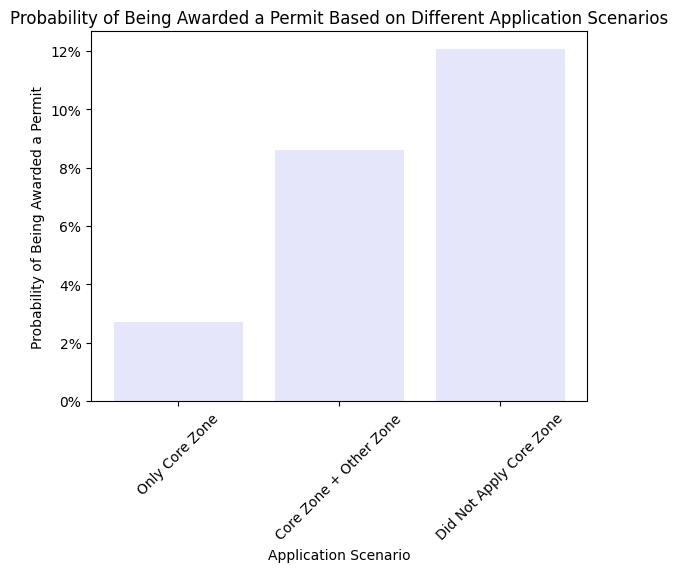

In [16]:
# Probability of being awarded a Core Zone permit given you applied for only the Core Zone in 2024: 2.71% (558/20569)
# Probability of being awarded a permit given you applied for the Core Zone and at least one other zone that was not the Core Zone in 2024: 8.62% (1243/14418)
# Probability of being awarded a permit given you DID NOT apply for Core Zone in 2024: 12.07% (864/7160)

# Create a bar chart showing the probabilities of being awarded a permit based on different application scenarios
plt.figure()

plt.bar(
    [
        "Only Core Zone",
        "Core Zone + Other Zone",
        "Did Not Apply Core Zone",
    ],
    [
        probability_only_applied_awarded_core,
        probability_applied_awarded_core_zone_not_core_zone,
        probability_did_not_apply_awarded_core_zone,
    ],
    color="lavender",
)

# Show y-axis as percent out to two decimal places
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

# Rotate labels on x-axis
plt.xticks(rotation=45)

plt.xlabel("Application Scenario")

plt.ylabel("Probability of Being Awarded a Permit")

plt.title(
    "Probability of Being Awarded a Permit Based on Different Application Scenarios"
)

# Save to png
plt.savefig("probability_awarded_permit_scenarios.png")

plt.show()

This is one of my favorite charts because it shows the percentage trade-offs with applicants choosing to apply for the Core Zone. 

Probability of being awarded a permit given you applied for the Core Zone once and at least one other zone that was not the Core Zone in 2024: 10.01% (912/9110)
Probability of being awarded a permit given you applied for the Core Zone twice and at least one other zone that was not the Core Zone in 2024: 6.24% (331/5308)
Probability of being awarded a permit given you applied for only the Core Zone on all three entries in 2024: 2.76% (552/19986)


/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_11926/1314579669.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])


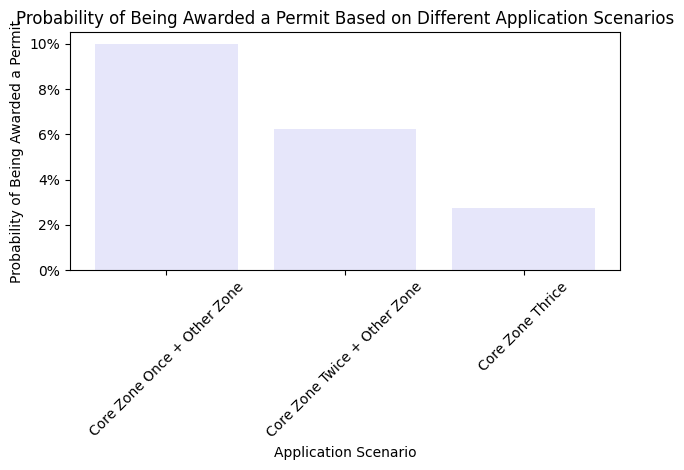

In [61]:
# Probability of being awarded a permit given you only applied for the Core Zone once and at least one other zone that was not the Core Zone

# Filter for applying for the Core Zone once and at least one other zone that is not the Core Zone
applied_core_zone_once_filter_1 = (
    applied_core_zone_1_filter
    & ~applied_core_zone_2_filter
    & ~applied_core_zone_3_filter
)

applied_core_zone_once_filter_2 = (
    applied_core_zone_2_filter
    & ~applied_core_zone_1_filter
    & ~applied_core_zone_3_filter
)

applied_core_zone_once_filter_3 = (
    applied_core_zone_3_filter
    & ~applied_core_zone_1_filter
    & ~applied_core_zone_2_filter
)

applied_core_zone_once = (
    applied_core_zone_once_filter_1
    | applied_core_zone_once_filter_2
    | applied_core_zone_once_filter_3
)

applied_core_zone_once_and_one_other_zone = (
    applied_core_zone_once & applied_core_zone_not_core_zone_filter
)

df_applied_for_core_zone_once = df[applied_core_zone_once_and_one_other_zone]

# Do the same thing but look at applications that applied for the Core Zone twice
applied_core_zone_twice_filter_1 = (
    applied_core_zone_1_filter
    & applied_core_zone_2_filter
    & ~applied_core_zone_3_filter
)

applied_core_zone_twice_filter_2 = (
    applied_core_zone_1_filter
    & applied_core_zone_3_filter
    & ~applied_core_zone_2_filter
)

applied_core_zone_twice_filter_3 = (
    applied_core_zone_2_filter
    & applied_core_zone_3_filter
    & ~applied_core_zone_1_filter
)

applied_core_zone_twice = (
    applied_core_zone_twice_filter_1
    | applied_core_zone_twice_filter_2
    | applied_core_zone_twice_filter_3
)

applied_core_zone_twice_and_one_other_zone = (
    applied_core_zone_twice & applied_core_zone_not_core_zone_filter
)

df_applied_for_core_zone_twice = df[applied_core_zone_twice_and_one_other_zone]

# Get the probability of winning given you applied for the Core Zone for all three entries
applied_core_zone_all_three = (
    applied_core_zone_1_filter & applied_core_zone_2_filter & applied_core_zone_3_filter
)

df_applied_for_core_zone_all_three = df[applied_core_zone_all_three]

probability_applied_awarded_core_zone_all_three = len(
    df_applied_for_core_zone_all_three[
        df_applied_for_core_zone_all_three["awarded_preference"] > 0
    ]
) / len(df_applied_for_core_zone_all_three)

# Print the probability awarded for each scenario
probability_applied_awarded_core_zone_once = len(
    df_applied_for_core_zone_once[
        df_applied_for_core_zone_once["awarded_preference"] > 0
    ]
) / len(df_applied_for_core_zone_once)

probability_applied_awarded_core_zone_twice = len(
    df_applied_for_core_zone_twice[
        df_applied_for_core_zone_twice["awarded_preference"] > 0
    ]
) / len(df_applied_for_core_zone_twice)

# Print the result
print(
    f"Probability of being awarded a permit given you applied for the Core Zone once and at least one other zone that was not the Core Zone in 2024: {probability_applied_awarded_core_zone_once:.2%} ({len(df_applied_for_core_zone_once[df_applied_for_core_zone_once['awarded_preference'] > 0])}/{len(df_applied_for_core_zone_once)})"
)

print(
    f"Probability of being awarded a permit given you applied for the Core Zone twice and at least one other zone that was not the Core Zone in 2024: {probability_applied_awarded_core_zone_twice:.2%} ({len(df_applied_for_core_zone_twice[df_applied_for_core_zone_twice['awarded_preference'] > 0])}/{len(df_applied_for_core_zone_twice)})"
)

print(
    f"Probability of being awarded a permit given you applied for only the Core Zone on all three entries in 2024: {probability_applied_awarded_core_zone_all_three:.2%} ({len(df_applied_for_core_zone_all_three[df_applied_for_core_zone_all_three['awarded_preference'] > 0])}/{len(df_applied_for_core_zone_all_three)})"
)

# Create a bar chart showing the probabilities of being awarded a permit based on different application scenarios
plt.figure()

plt.bar(
    [
        "Core Zone Once + Other Zone",
        "Core Zone Twice + Other Zone",
        "Core Zone Thrice",
    ],
    [
        probability_applied_awarded_core_zone_once,
        probability_applied_awarded_core_zone_twice,
        probability_applied_awarded_core_zone_all_three,
    ],
    color="lavender",
)

# Show y-axis as percent out to two decimal places
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

# Rotate labels on x-axis
plt.xticks(rotation=45)

plt.xlabel("Application Scenario")

plt.ylabel("Probability of Being Awarded a Permit")

plt.title(
    "Probability of Being Awarded a Permit Based on Different Application Scenarios"
)

plt.tight_layout()

# Save to png
plt.savefig("probability_awarded_permit_scenarios.png")

plt.show()

I also like this chart because it shows how applying for the Core Zone in your entries affects your chances of being awarded a permit. 

In [18]:
def sort_zone_probabilities(x):
    return x.sort(key=lambda x: x[1], reverse=True)


def create_zone_probability_dataframe(x, columns):
    return pd.DataFrame(
        x,
        columns=columns,
    )


def add_probability_percent_column(df):
    df["Probability (%)"] = df["Probability"].map("{:.2%}".format)
    return df


def zone_probabilities_to_crosstab(x, columns):
    sort_zone_probabilities(x)
    return add_probability_percent_column(create_zone_probability_dataframe(x, columns))

In [19]:
# Get the probability of being awared a permit for a zone given you applied for that zone

# Get a list of all the zones
zones_values = df["preferred_zone_1"].unique()

prob_awarded_zone_applied_for = []

# Loop over the zones and calculate the probability of being awarded a permit for each zone
for zone in zones_values:
    applied_1 = df["preferred_zone_1"] == zone
    applied_2 = df["preferred_zone_2"] == zone
    applied_3 = df["preferred_zone_3"] == zone

    zone_filter = applied_1 | applied_2 | applied_3

    applied_zone = df[zone_filter]

    total_zone = len(applied_zone)

    awarded_zone_filter = df["awarded_entrance_code_name"] == zone

    total_zone_awarded = len(df[zone_filter & awarded_zone_filter])
    prob_zone_awarded = total_zone_awarded / total_zone

    prob_awarded_zone_applied_for.append(
        [zone, prob_zone_awarded, total_zone_awarded, total_zone]
    )

    print(
        f"Probability of being awarded a permit for {zone}, given applied 1+ option in zone: {prob_zone_awarded:.2%} ({total_zone_awarded}/{total_zone})"
    )


df_prob_awarded_zone_applied_for = zone_probabilities_to_crosstab(
    prob_awarded_zone_applied_for,
    ["Zone", "Probability", "Total Awarded", "Total Applied"],
)

# Show crosstab of the new dataframe
df_prob_awarded_zone_applied_for

Probability of being awarded a permit for Core Enchantment Zone, given applied 1+ option in zone: 2.22% (790/35605)
Probability of being awarded a permit for Stuart  Zone, given applied 1+ option in zone: 9.15% (529/5783)
Probability of being awarded a permit for Colchuck Zone, given applied 1+ option in zone: 2.62% (380/14496)
Probability of being awarded a permit for Snow Zone, given applied 1+ option in zone: 7.27% (689/9474)
Probability of being awarded a permit for Eightmile/Caroline Zone, given applied 1+ option in zone: 14.02% (353/2518)


,Zone,Probability,Total Awarded,Total Applied,Probability (%)
0,Eightmile/Caroline Zone,0.140191,353,2518,14.02%
1,Stuart Zone,0.091475,529,5783,9.15%
2,Snow Zone,0.072725,689,9474,7.27%
3,Colchuck Zone,0.026214,380,14496,2.62%
4,Core Enchantment Zone,0.022188,790,35605,2.22%


This table is similar to the analysis we did above on the Core Enchantment Zone but it looks at applicants that one permits given at least one of their permits was for the zone they won a permit for. What's surprising to me in this scenario is just how difficult it is to win permits for the Colchuck Zone. It's nearly as difficult at the Core Zone.

/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_11926/3793792790.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])


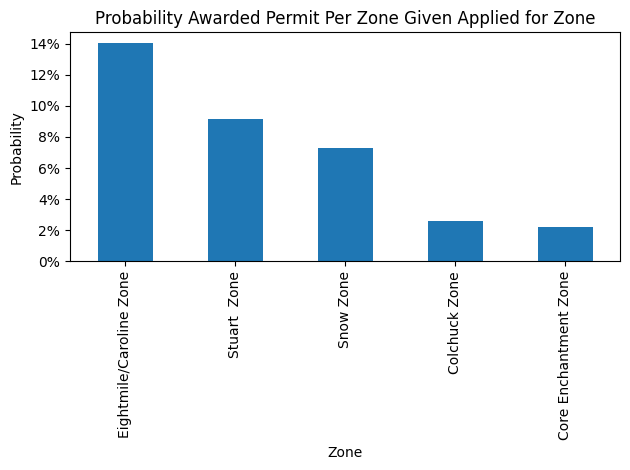

In [20]:
# Show bar chart of the probability of being awarded a permit for each zone given you applied for that zone
df_prob_awarded_zone_applied_for.set_index("Zone")["Probability"].plot(kind="bar")

plt.xlabel("Zone")

plt.ylabel("Probability")

# Show y axis as percentage
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.title("Probability Awarded Permit Per Zone Given Applied for Zone")

# Save the plot to a PNG file
# Extend bottom to show entire plot
plt.tight_layout()
plt.savefig("probability_awarded_permit_per_zone.png")

plt.show()

The way to interpret the above chart is these are the odds of winning a permit for each zone given at least one of your application entries was for that zone. The number is calculated based on if you applied for a zone and were awarded said zone divided by the number of applications that applied for that zone

For example, if you applied for a only the Snow Zone, it would be your probably of winning against everyone else that applied for at least one Snow Zone entry.

This chart is helpful because it shows the true probability by zone at the application level.

### Applied for By Zone

As stated, the lottery doesn't only operate at the application level. It operates on a per entry basis and each entry has a date, zone, and group size. 

To get a true picture of the application process I think it's important to split all the applications up by **ENTRY**. This allows me to analyze each entry against all entries. Entries compete against other entries, they don't compete against applications as a whole. 

Saying an application was successful leaves room in the analysis because it's dependant on which entry in the application was successful.

To examine the applications by zone we use the split data entries from the applications.

#### Import the Split 2024 Results

In [21]:
# Import split skipped from csv file
df_split = pd.read_csv(
    "./2024_results_split.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df_split.head()

,preferred_division,preferred_entry_date,maximum_requested_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Core Enchantment Zone,2024-05-15,4,Unsuccessful,0,1970-01-01,N/A,0,False,1,May,Wednesday
1,Core Enchantment Zone,2024-05-15,8,Unsuccessful,0,1970-01-01,N/A,0,False,1,May,Wednesday
2,Stuart Zone,2024-05-15,4,Unsuccessful,0,1970-01-01,N/A,0,False,1,May,Wednesday
3,Core Enchantment Zone,2024-05-15,8,Unsuccessful,0,1970-01-01,N/A,0,False,1,May,Wednesday
4,Core Enchantment Zone,2024-05-15,4,Unsuccessful,0,1970-01-01,N/A,0,False,1,May,Wednesday


In [22]:
# Show total split entries by zone
# Print the result
print(f"Total split entries by zone:")
df_split["preferred_division"].value_counts()

Total split entries by zone:


preferred_division
Core Enchantment Zone      81584
Colchuck Zone              20375
Snow Zone                  13355
Stuart  Zone                8423
Eightmile/Caroline Zone     2982
Name: count, dtype: int64

In [23]:
# Divide the Core Enchantment Zone total by the total for all entries
core_zone_total = df_split["preferred_division"].value_counts()["Core Enchantment Zone"]

total_entries = len(df_split)

core_zone_percentage = core_zone_total / total_entries

# Print the result
print(
    f"Percentage of split entries for the Core Enchantment Zone: {core_zone_percentage:.2%}"
)

Percentage of split entries for the Core Enchantment Zone: 64.38%


Splitting the entries by zone show us just how popular the Core Enchantment Zone is. Core Enchantment Zone entries made up 64.38% of all entries in the lottery.

#### Import the Split 2023 Results

Next, I'll import the 2023 split results for comparison.

In [24]:
# Import split skipped from csv file
df_split_2023 = pd.read_csv(
    "../2023/2023_results_split.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df_split_2023.head()

,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Core Enchantment Zone,2023-06-18,2,Awarded,1,2023-06-18,Core Enchantment Zone,2,438,OR,True,1,June,Sunday
1,Core Enchantment Zone,2023-08-21,8,Unsuccessful,0,1970-01-01,N/A,0,16219,WA,False,1,August,Monday
2,Core Enchantment Zone,2023-06-09,4,Unsuccessful,0,1970-01-01,N/A,0,35433,WA,False,1,June,Friday
3,Core Enchantment Zone,2023-07-06,2,Unsuccessful,0,1970-01-01,N/A,0,22536,WA,False,1,July,Thursday
4,Core Enchantment Zone,2023-09-09,3,Unsuccessful,0,1970-01-01,N/A,0,31307,WA,False,1,September,Saturday


In [25]:
# Show total split entries by zone
# Print the result
print(f"Total split entries by zone:")
df_split_2023["preferred_zone"].value_counts()

Total split entries by zone:


preferred_zone
Core Enchantment Zone              75616
Colchuck Zone                      18876
Snow Zone                          13238
Stuart  Zone                        7203
Eightmile/Caroline Zone             2455
Eightmile/Caroline Zone (stock)      323
Stuart Zone (stock)                  214
Name: count, dtype: int64

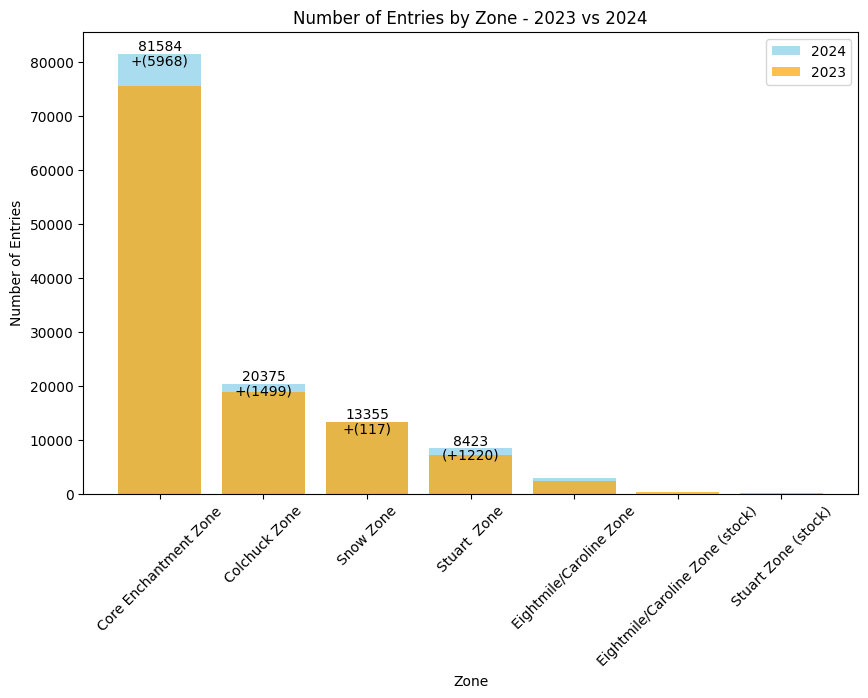

In [26]:
# Create a bar chart comparing the number of split entries by zone in 2023 and 2024
plt.figure(figsize=(10, 6))
plt.bar(
    df_split["preferred_division"].value_counts().index,
    df_split["preferred_division"].value_counts().values,
    color="skyblue",
    label="2024",
    alpha=0.7,
)
plt.bar(
    df_split_2023["preferred_zone"].value_counts().index,
    df_split_2023["preferred_zone"].value_counts().values,
    color="orange",
    label="2023",
    alpha=0.7,
)
plt.xlabel("Zone")

# Rotate the x-axis label to make it easier to read
plt.xticks(rotation=45)

# Show the increase for the Core Enchantment Zone from 2023 to 2024
plt.text(
    0,
    df_split["preferred_division"].value_counts().values[0],
    f"{df_split['preferred_division'].value_counts().values[0]}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    0,
    df_split["preferred_division"].value_counts().values[0],
    f"+({df_split['preferred_division'].value_counts().values[0] - df_split_2023['preferred_zone'].value_counts().values[0]})",
    ha="center",
    va="top",
    color="black",
)

plt.text(
    1,
    df_split["preferred_division"].value_counts().values[1],
    f"{df_split['preferred_division'].value_counts().values[1]}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    1,
    df_split["preferred_division"].value_counts().values[1],
    f"+({df_split['preferred_division'].value_counts().values[1] - df_split_2023['preferred_zone'].value_counts().values[1]})",
    ha="center",
    va="top",
    color="black",
)

plt.text(
    2,
    df_split["preferred_division"].value_counts().values[2],
    f"{df_split['preferred_division'].value_counts().values[2]}",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(
    2,
    df_split["preferred_division"].value_counts().values[2],
    f"+({df_split['preferred_division'].value_counts().values[2] - df_split_2023['preferred_zone'].value_counts().values[2]})",
    ha="center",
    va="top",
    color="black",
)

plt.text(
    3,
    df_split["preferred_division"].value_counts().values[3],
    f"{df_split['preferred_division'].value_counts().values[3]}",
    ha="center",
    va="bottom",
    color="black",
)

plt.text(
    3,
    df_split["preferred_division"].value_counts().values[3],
    f"(+{df_split['preferred_division'].value_counts().values[3] - df_split_2023['preferred_zone'].value_counts().values[3]})",
    ha="center",
    va="top",
    color="black",
)

plt.ylabel("Number of Entries")
plt.title("Number of Entries by Zone - 2023 vs 2024")

# Save to png
plt.savefig("entries_by_zone_2023_vs_2024.png")

plt.legend()
plt.show()

The Core Enchantment Zone saw the biggest jump in applications entries from 2023-2024

### Applied and Awarded By Month

In this section, I'll take a look at the application entries broken down by month.

In [27]:
# Show total entries by month
df_split["preferred_entry_date_month"].value_counts()

preferred_entry_date_month
August       42934
July         34361
September    26534
June         13138
October       7306
May           2446
Name: count, dtype: int64

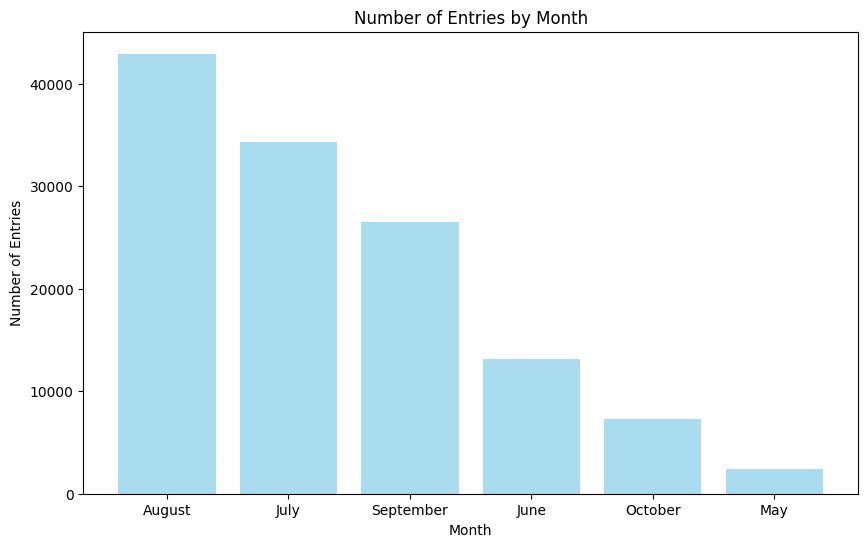

In [28]:
# Plot the applicatons by month
plt.figure(figsize=(10, 6))
plt.bar(
    df_split["preferred_entry_date_month"].value_counts().index,
    df_split["preferred_entry_date_month"].value_counts().values,
    color="skyblue",
    alpha=0.7,
)
plt.xlabel("Month")
plt.ylabel("Number of Entries")
plt.title("Number of Entries by Month")

# Save to png
plt.savefig("entries_by_month.png")

plt.show()

August and July see the most application entries.

In [29]:
# Get the total awarded permits by month
awarded_split_filter = df_split["awarded"] == True
awarded_preference_filter = (
    df_split["awarded_preference"] == df_split["preferred_option"]
)

df_split_awarded = df_split[awarded_split_filter & awarded_preference_filter]

# Group awarded by month
df_awarded_by_month = (
    df_split_awarded.groupby("preferred_entry_date_month")["awarded"]
    .count()
    .to_frame(name="Total Awarded")
)

df_awarded_by_month

,Total Awarded
preferred_entry_date_month,
August,511
July,524
June,502
May,276
October,403
September,525


In [30]:
# Create a dataframe showng the applied for by month the awarded permits per month and the percentage
df_applied_by_month = (
    df_split["preferred_entry_date_month"].value_counts().to_frame(name="Total Applied")
)

df_applied_awarded_by_month = df_applied_by_month.join(df_awarded_by_month)

df_applied_awarded_by_month["Percentage Awarded"] = (
    df_applied_awarded_by_month["Total Awarded"]
    / df_applied_awarded_by_month["Total Applied"]
)


df_applied_awarded_by_month["Percentage Awarded (%)"] = df_applied_awarded_by_month[
    "Percentage Awarded"
].map("{:.2%}".format)

df_applied_awarded_by_month

,Total Applied,Total Awarded,Percentage Awarded,Percentage Awarded (%)
preferred_entry_date_month,,,,
August,42934,511,0.011902,1.19%
July,34361,524,0.015250,1.52%
September,26534,525,0.019786,1.98%
June,13138,502,0.038210,3.82%
October,7306,403,0.055160,5.52%
May,2446,276,0.112837,11.28%


The above table shows how many of entries get awarded as a percentage of the total entries by month. As can be seen, August, July and September are all pretty similar.

/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_11926/3802870256.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])


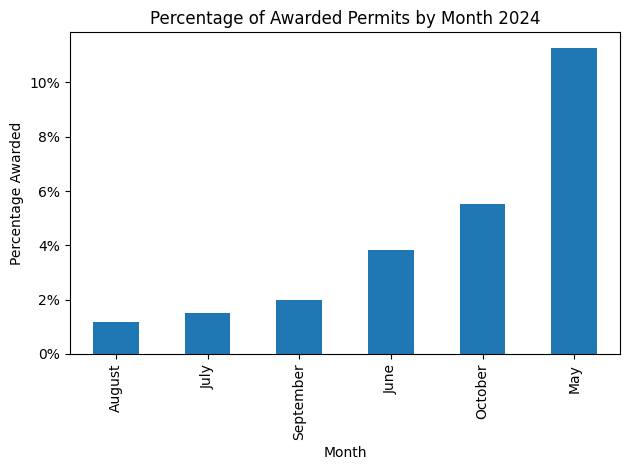

In [31]:
# Show a bar chart of the percentage awarded by month
df_applied_awarded_by_month["Percentage Awarded"].plot(kind="bar")

plt.xlabel("Month")
plt.ylabel("Percentage Awarded")

# Show y axis as percentage
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.title("Percentage of Awarded Permits by Month 2024")

# Save the plot to a PNG file
plt.tight_layout()
plt.savefig("percentage_awarded_permit_by_month.png")

plt.show()

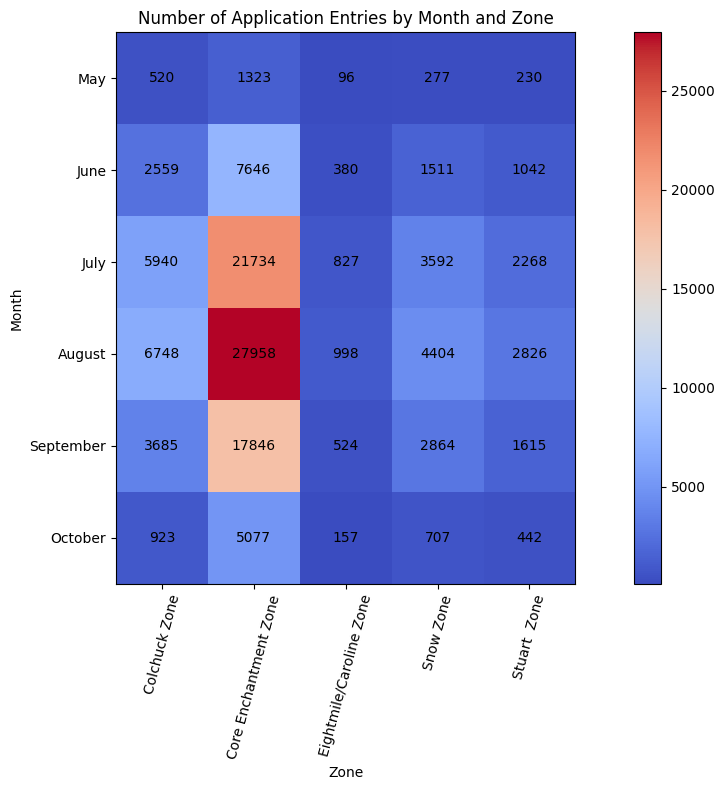

In [32]:
## Create a heatmap of the number of applications by month and zone
# Group the data by month and zone
df_month_zone = df_split.groupby(["preferred_entry_date_month", "preferred_division"])[
    "preferred_division"
].count()

# Sort the months in chronological order
df_month_zone = df_month_zone.reindex(
    [
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
    ],
    level=0,
)

# Unstack the data to create a matrix
df_month_zone = df_month_zone.unstack()

# Fill any missing values with 0
df_month_zone.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(df_month_zone, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

# Show the totals for each month
for i in range(len(df_month_zone.index)):
    for j in range(len(df_month_zone.columns)):
        plt.text(
            j, i, df_month_zone.iloc[i, j], ha="center", va="center", color="black"
        )


plt.xticks(range(len(df_month_zone.columns)), df_month_zone.columns, rotation=75)
plt.yticks(range(len(df_month_zone.index)), df_month_zone.index)
plt.xlabel("Zone")
plt.ylabel("Month")
plt.title("Number of Application Entries by Month and Zone")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("heatmap_month_zone.png")

plt.show()

In the heatmap above, we can see just how popular the Core Enchantment Zone is in July, August, and September compared to the other zones and months.

However, the Core Zone doesn't have the same lottery rules and more permits are awarded. To make it less, misleading, let's create a heatmap showing the percentages of awarded entries to total entries by month and zone.

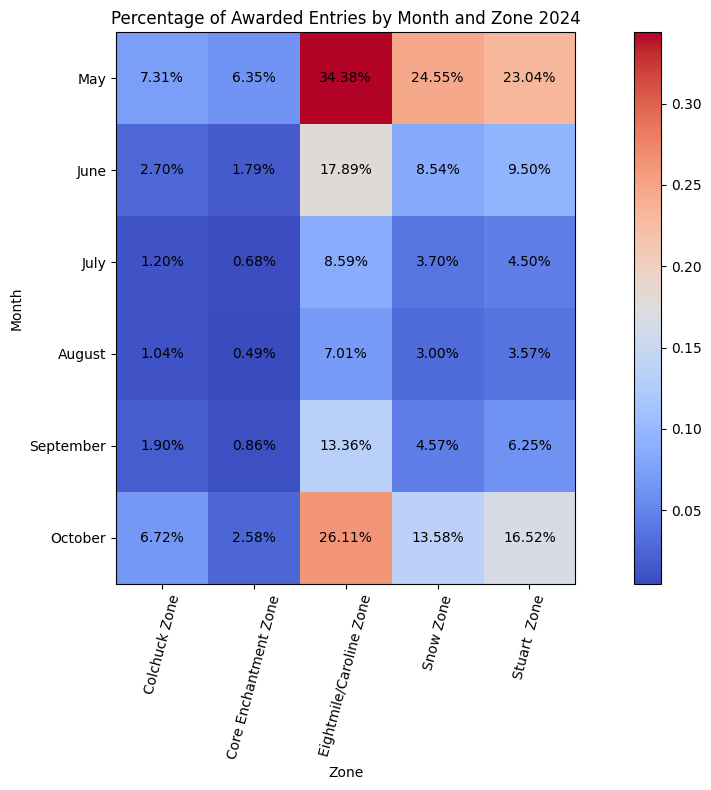

In [33]:
# Create heatmap showing the number of awarded permits by month and zone as a percentage of the total applications
# Group the data by month and zone
df_month_zone_awarded = df_split_awarded.groupby(
    ["preferred_entry_date_month", "preferred_division"]
)["preferred_division"].count()

# Sort the months in chronological order
df_month_zone_awarded = df_month_zone_awarded.reindex(
    [
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
    ],
    level=0,
)

# Unstack the data to create a matrix
df_month_zone_awarded = df_month_zone_awarded.unstack()

# Fill any missing values with 0
df_month_zone_awarded.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(
    df_month_zone_awarded / df_month_zone, cmap="coolwarm", interpolation="nearest"
)
plt.colorbar()

# Show the totals for each month
for i in range(len(df_month_zone_awarded.index)):
    for j in range(len(df_month_zone_awarded.columns)):
        plt.text(
            j,
            i,
            f"{df_month_zone_awarded.iloc[i, j] / df_month_zone.iloc[i, j]:.2%}",
            ha="center",
            va="center",
            color="black",
        )

plt.xticks(
    range(len(df_month_zone_awarded.columns)),
    df_month_zone_awarded.columns,
    rotation=75,
)

plt.yticks(range(len(df_month_zone_awarded.index)), df_month_zone_awarded.index)

plt.xlabel("Zone")

plt.ylabel("Month")

plt.title("Percentage of Awarded Entries by Month and Zone 2024")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("heatmap_month_zone_awarded.png")


plt.show()

The above map shows the "hottest" zone + month combinations for awarded application entries. I like this heatmap because if you're looking to go to the Enchantments in a specific month you can compare the zone percentages and totals.

### Applied by Day of Week

My favorite part of the analysis is the day of the week because it has such big implications. The implications are a result of the daily walk-up lottery discussed early. Additionally, there are many societal and situational factors the play into how people apply based on the day.

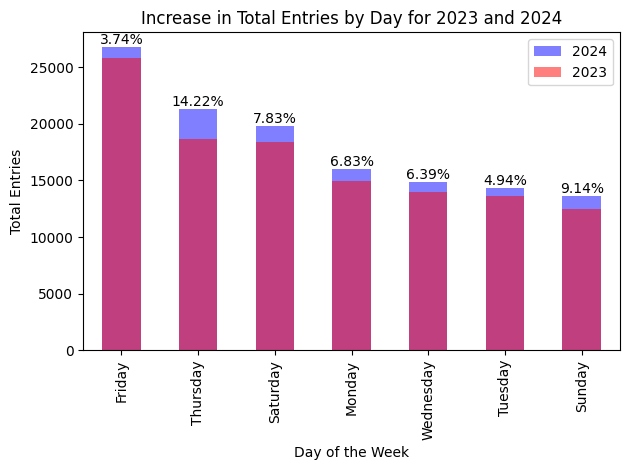

In [34]:
# Chart the preferred_entry_date_day for 2024 against the preferred_entry_date_day for 2023
df_split["preferred_entry_date_day"].value_counts().plot(
    kind="bar", color="blue", alpha=0.5, label="2024"
)

df_split_2023["preferred_entry_date_day"].value_counts().plot(
    kind="bar", color="red", alpha=0.5, label="2023"
)

plt.xlabel("Day of the Week")

plt.ylabel("Total Entries")

# Show percentage increase from 2023 to 2024 next to each bar
for i in range(7):
    increase = (
        df_split["preferred_entry_date_day"].value_counts().iloc[i]
        - df_split_2023["preferred_entry_date_day"].value_counts().iloc[i]
    ) / df_split_2023["preferred_entry_date_day"].value_counts().iloc[i]
    plt.text(
        i,
        df_split["preferred_entry_date_day"].value_counts().iloc[i],
        f"{increase:.2%}",
        ha="center",
        # Add a little space between the text and the top of the bar
        va="bottom",
    )

plt.title("Increase in Total Entries by Day for 2023 and 2024")

plt.legend()

# Save the plot to a PNG file
plt.tight_layout()
plt.savefig("increase_in_total_entries_by_day.png")

plt.show()

In 2023, Sunday saw the largest jump in total entries but remained the least applied for day. Again, application enrties for Sunday for increased from the year before. However, it remains the least applied for day of the week. If you combine the two pieces of data that Sunday is the least applied for day AND it's the day where there are more permits given out in the advanced lottery it's easy to see why it's the best (and easiest) choice for increasing your odds in the lottery outside of choosing different zones.

In [35]:
# import the split 2020 data
df_split_2020 = pd.read_csv(
    "../2020/2020_results_split.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

df_split_2020.head()

,preferred_zone,preferred_entry_date,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Colchuck Zone,2020-06-26,Unsuccessful,0,1970-01-01,N/A,0,False,1,June,Friday
1,Core Enchantment Zone,2020-08-01,Unsuccessful,0,1970-01-01,N/A,0,False,1,August,Saturday
2,Core Enchantment Zone,2020-09-19,Unsuccessful,0,1970-01-01,N/A,0,False,1,September,Saturday
3,Core Enchantment Zone,2020-08-22,Unsuccessful,0,1970-01-01,N/A,0,False,1,August,Saturday
4,Snow Zone,2020-07-17,Awarded,1,2020-07-17,Snow Zone,6,True,1,July,Friday


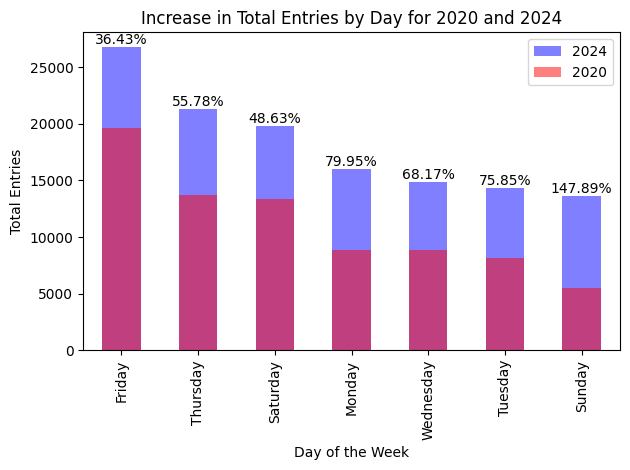

In [36]:
# Chart the preferred_entry_date_day for 2024 against the preferred_entry_date_day for 2020
df_split["preferred_entry_date_day"].value_counts().plot(
    kind="bar", color="blue", alpha=0.5, label="2024"
)

df_split_2020["preferred_entry_date_day"].value_counts().plot(
    kind="bar", color="red", alpha=0.5, label="2020"
)

plt.xlabel("Day of the Week")

plt.ylabel("Total Entries")

# Show percentage increase from 2020 to 2024 next to each bar
for i in range(7):
    increase = (
        df_split["preferred_entry_date_day"].value_counts().iloc[i]
        - df_split_2020["preferred_entry_date_day"].value_counts().iloc[i]
    ) / df_split_2020["preferred_entry_date_day"].value_counts().iloc[i]
    plt.text(
        i,
        df_split["preferred_entry_date_day"].value_counts().iloc[i],
        f"{increase:.2%}",
        ha="center",
        # Add a little space between the text and the top of the bar
        va="bottom",
    )

plt.title("Increase in Total Entries by Day for 2020 and 2024")

plt.legend()

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("increase_in_total_entries_by_day_2020.png")

plt.show()

I've said it before, the secret got out that Sunday was the under utilized day and the increase of entries since 2020 seems to show that. Despite the largest increase in total entries it remains the least applied for day.

### Awarded by Day of Week

In 2024, the Forest Service closed the walk-up lottery for Mondays. Meaning more permits would be released in the advanced lottery on Mondays.

In [37]:
# Get the total awarded permit entries by day of the week
df_awarded_by_day = (
    df_split_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded 2024")
)

df_split_awarded_2023 = df_split_2023[df_split_2023["awarded"] == True]

df_awarded_by_day_2023 = (
    df_split_awarded_2023["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded 2023")
)

df_awarded_by_day = df_awarded_by_day.join(df_awarded_by_day_2023)

df_awarded_by_day["Percentage Increase Awarded"] = (
    df_awarded_by_day["Total Awarded 2024"] - df_awarded_by_day["Total Awarded 2023"]
) / df_awarded_by_day["Total Awarded 2023"]

df_awarded_by_day["Percentage Increase (%)"] = df_awarded_by_day[
    "Percentage Increase Awarded"
].map("{:.2%}".format)

# Show the table
df_awarded_by_day

,Total Awarded 2024,Total Awarded 2023,Percentage Increase Awarded,Percentage Increase (%)
preferred_entry_date_day,,,,
Monday,493,359,0.373259,37.33%
Sunday,477,468,0.019231,1.92%
Thursday,359,347,0.034582,3.46%
Friday,358,349,0.025788,2.58%
Wednesday,352,340,0.035294,3.53%
Saturday,352,350,0.005714,0.57%
Tuesday,350,345,0.014493,1.45%


Just as expected! Monday saw a huge increase in percentage awarded now that the walk-up lottery is closed that day. In total 134 more permits were awarded for Mondays.

In [38]:
# Add a column for total applied for in 2024
df_applied_by_day = (
    df_split["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Applied 2024")
)

# Add a column for total applied for in 2023
df_applied_by_day_2023 = (
    df_split_2023["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Applied 2023")
)

df_applied_by_day = df_applied_by_day.join(df_applied_by_day_2023)

df_awarded_by_day_2024 = (
    df_split_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded 2024")
)

df_applied_by_day = df_applied_by_day.join(df_awarded_by_day_2024)

df_split_awarded_2023_2 = df_split_2023[df_split_2023["awarded"] == True]

df_split_awarded_2023_2 = (
    df_split_awarded_2023["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded 2023")
)

df_applied_by_day = df_applied_by_day.join(df_split_awarded_2023_2)

# Divide the total applied for by the total awarded to get the percentage awarded
df_applied_by_day["Percentage Awarded 2024"] = (
    df_applied_by_day["Total Awarded 2024"] / df_applied_by_day["Total Applied 2024"]
)

df_applied_by_day["Percentage Awarded 2024 (%)"] = df_applied_by_day[
    "Percentage Awarded 2024"
].map("{:.2%}".format)

df_applied_by_day["Percentage Increase Awarded"] = (
    df_applied_by_day["Total Awarded 2024"] - df_applied_by_day["Total Awarded 2023"]
) / df_applied_by_day["Total Awarded 2023"]

df_applied_by_day["Percentage Increase (%)"] = df_applied_by_day[
    "Percentage Increase Awarded"
].map("{:.2%}".format)

# Show the percentge awarded for 2023
df_applied_by_day["Percentage Awarded 2023"] = (
    df_applied_by_day["Total Awarded 2023"] / df_applied_by_day["Total Applied 2023"]
)

df_applied_by_day["Percentage Awarded 2023 (%)"] = df_applied_by_day[
    "Percentage Awarded 2023"
].map("{:.2%}".format)

# Sort by percentage awarded 2024
df_applied_by_day = df_applied_by_day.sort_values(
    "Percentage Awarded 2024", ascending=False
)

# Show the table
df_applied_by_day

,Total Applied 2024,Total Applied 2023,Total Awarded 2024,Total Awarded 2023,Percentage Awarded 2024,Percentage Awarded 2024 (%),Percentage Increase Awarded,Percentage Increase (%),Percentage Awarded 2023,Percentage Awarded 2023 (%)
preferred_entry_date_day,,,,,,,,,,
Sunday,13639,12497,477,468,0.034973,3.50%,0.019231,1.92%,0.037449,3.74%
Monday,15971,14950,493,359,0.030868,3.09%,0.373259,37.33%,0.024013,2.40%
Tuesday,14300,13627,350,345,0.024476,2.45%,0.014493,1.45%,0.025317,2.53%
Wednesday,14900,14005,352,340,0.023624,2.36%,0.035294,3.53%,0.024277,2.43%
Saturday,19806,18367,352,350,0.017772,1.78%,0.005714,0.57%,0.019056,1.91%
Thursday,21353,18694,359,347,0.016813,1.68%,0.034582,3.46%,0.018562,1.86%
Friday,26750,25785,358,349,0.013383,1.34%,0.025788,2.58%,0.013535,1.35%


The table above shows the percentage of awarded permits by day of the week for 2024 and 2023.

/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_11926/908009920.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])


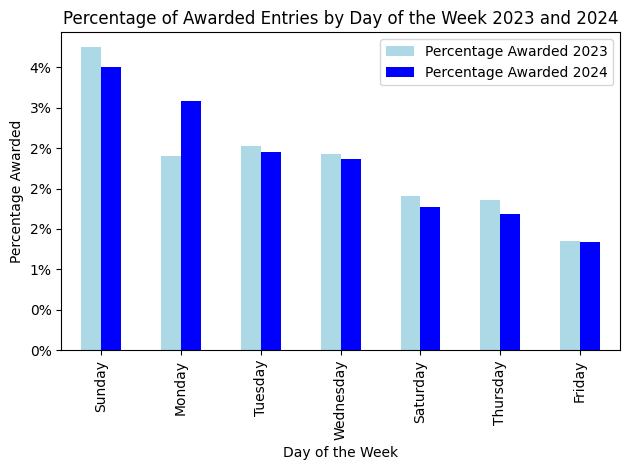

In [39]:
# Create a bar chart showing the percentage awarded by day of the week for 2023 and 2024
# as a side by side bar chart
df_applied_by_day[["Percentage Awarded 2023", "Percentage Awarded 2024"]].plot(
    kind="bar", color=["lightblue", "blue"]
)

plt.xlabel("Day of the Week")

plt.ylabel("Percentage Awarded")

# Show y axis as percentage
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.title("Percentage of Awarded Entries by Day of the Week 2023 and 2024")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("percentage_awarded_permit_by_day.png")

plt.legend()

plt.show()

In general, the percentages decreased from 2023 to 2024. Except, for Monday, which easily jumped up into second best day to apply in 2024 moving ahead of Tuesday and Wednesday. Previously, Monday was a surprisingly popular day, making Tuesday and Wednesday better days to apply.

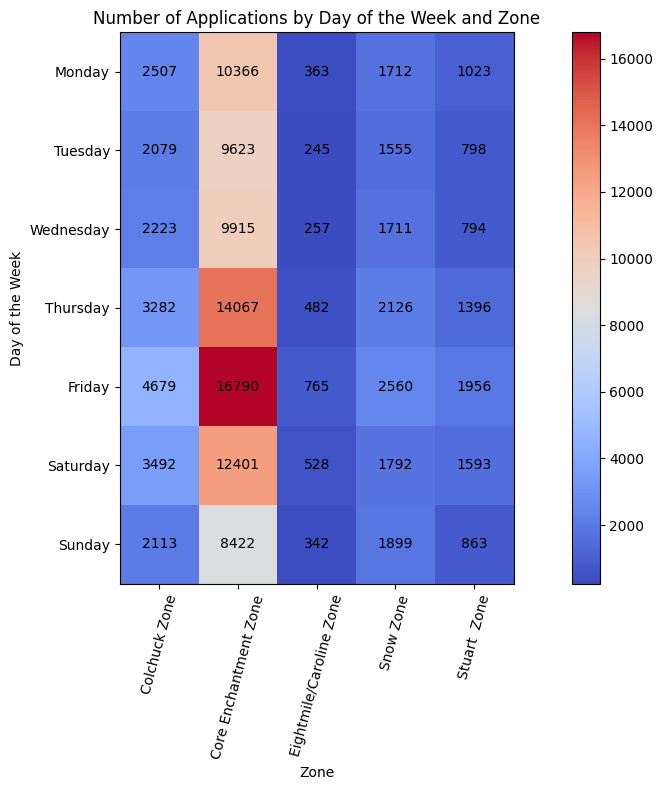

In [40]:
# Create a heatmap of the number of applications by day of the week and zone
# Group the data by day of the week and zone
df_day_zone = df_split.groupby(["preferred_entry_date_day", "preferred_division"])[
    "preferred_division"
].count()

# Sort the days of the week in chronological order
df_day_zone = df_day_zone.reindex(
    [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    level=0,
)

# Unstack the data to create a matrix
df_day_zone = df_day_zone.unstack()

# Fill any missing values with 0
df_day_zone.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(df_day_zone, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

# Show the totals for each day of the week
for i in range(len(df_day_zone.index)):
    for j in range(len(df_day_zone.columns)):
        plt.text(j, i, df_day_zone.iloc[i, j], ha="center", va="center", color="black")

plt.xticks(range(len(df_day_zone.columns)), df_day_zone.columns, rotation=75)

plt.yticks(range(len(df_day_zone.index)), df_day_zone.index)

plt.xlabel("Zone")

plt.ylabel("Day of the Week")

plt.title("Number of Applications by Day of the Week and Zone")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("heatmap_day_zone.png")

plt.show()

The heatmaps are really cool. The above shows the application entries by day of the week and zone. This is one of my favorite visualizations because someone can look at a zone they want to try for and choose the best day that works for them.

For example, Tuesdays and Wednesdays actually saw less application entries in a number of zones than Sunday. But, Sunday was giving out more inventory. Therefore, it was the better day.

#### Core Enchantment Zone

The Core Enchantment Zone plays by different rules. It's based on date AND group size because permits are awarded by PERSON not by GROUP.

Subsequently, it makes sense to analyze it separately.

In [41]:
# Filter df_split to only include Core Enchantment Zone
core_zone_filter = df_split["preferred_division"] == "Core Enchantment Zone"

df_split_core_zone = df_split[core_zone_filter]

# Get the total awarded permit entries for the Core Enchantment Zone
df_split_core_zone_awarded = df_split_core_zone[
    (df_split_core_zone["awarded"] == True)
    & (
        df_split_core_zone["awarded_preference"]
        == df_split_core_zone["preferred_option"]
    )
]

In [42]:
# Add a column for total applied for in 2024
df_applied_by_day_core = (
    df_split_core_zone["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Applied Core 2024")
)

df_awarded_by_day_2024 = (
    df_split_core_zone_awarded["preferred_entry_date_day"]
    .value_counts()
    .to_frame(name="Total Awarded Core 2024")
)

df_applied_by_day_core = df_applied_by_day_core.join(df_awarded_by_day_2024)


# Divide the total applied for by the total awarded to get the percentage awarded
df_applied_by_day_core["Percentage Awarded 2024"] = (
    df_applied_by_day_core["Total Awarded Core 2024"]
    / df_applied_by_day_core["Total Applied Core 2024"]
)

df_applied_by_day_core["Percentage Awarded 2024 (%)"] = df_applied_by_day_core[
    "Percentage Awarded 2024"
].map("{:.2%}".format)

# Sort by percentage awarded 2024
df_applied_by_day_core = df_applied_by_day_core.sort_values(
    "Percentage Awarded 2024", ascending=False
)

# Show the table
df_applied_by_day_core

,Total Applied Core 2024,Total Awarded Core 2024,Percentage Awarded 2024,Percentage Awarded 2024 (%)
preferred_entry_date_day,,,,
Sunday,8422,139,0.016504,1.65%
Monday,10366,154,0.014856,1.49%
Tuesday,9623,105,0.010911,1.09%
Wednesday,9915,97,0.009783,0.98%
Saturday,12401,95,0.007661,0.77%
Thursday,14067,101,0.007180,0.72%
Friday,16790,99,0.005896,0.59%


/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_11926/3287298275.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.2f}%".format(x * 100) for x in plt.gca().get_yticks()])


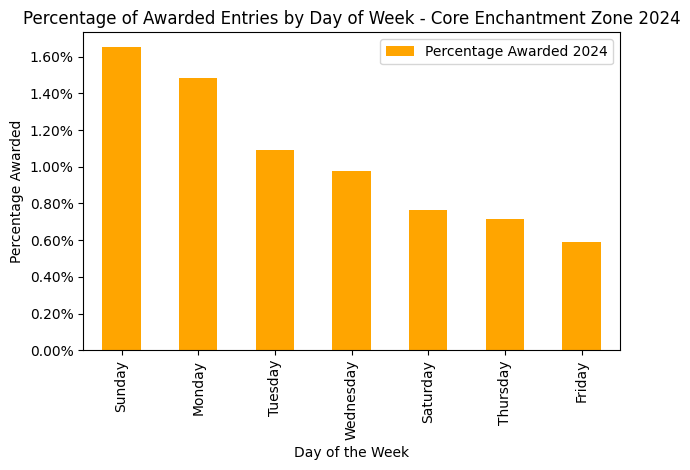

In [43]:
# Create a bar chart showing the percentage awarded by day of the week for 2023 and 2024
# as a side by side bar chart
df_applied_by_day_core[["Percentage Awarded 2024"]].plot(kind="bar", color=["orange"])

plt.xlabel("Day of the Week")

plt.ylabel("Percentage Awarded")

# Show y axis as percentage
plt.gca().set_yticklabels(["{:.2f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.title("Percentage of Awarded Entries by Day of Week - Core Enchantment Zone 2024")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("percentage_awarded_permit_by_day_core.png")


plt.legend()

plt.show()

### Awarded & Applied by Group Size in Core Enchantment Zone

In [44]:
# Create a dataframe with the total awarded entries by group size for the Core Enchantment Zone 2024
df_split_core_zone_awarded["maximum_requested_group_size"].value_counts().to_frame(
    name="Total Awarded"
)

# Create a dataframe with the total applied entries by group size for the Core Enchantment Zone 2024
df_split_core_zone["maximum_requested_group_size"].value_counts().to_frame(
    name="Total Applied"
)

# Combine the dataframes to show the percentage awarded by group size for the Core Enchantment Zone 2024
df_group_size = (
    df_split_core_zone["maximum_requested_group_size"]
    .value_counts()
    .to_frame(name="Total Applied")
)

df_group_size_awarded = (
    df_split_core_zone_awarded["maximum_requested_group_size"]
    .value_counts()
    .to_frame(name="Total Awarded")
)

df_group_size = df_group_size.join(df_group_size_awarded)

df_group_size["Percentage Awarded"] = (
    df_group_size["Total Awarded"] / df_group_size["Total Applied"]
)

df_group_size["Percentage Awarded (%)"] = df_group_size["Percentage Awarded"].map(
    "{:.2%}".format
)

# Sort by percentage awarded
df_group_size = df_group_size.sort_values("Percentage Awarded", ascending=False)

# Show the table
df_group_size

,Total Applied,Total Awarded,Percentage Awarded,Percentage Awarded (%)
maximum_requested_group_size,,,,
1,1223,66,0.053966,5.40%
2,17421,231,0.013260,1.33%
3,6064,56,0.009235,0.92%
4,25618,205,0.008002,0.80%
8,12549,98,0.007809,0.78%
6,12412,95,0.007654,0.77%
5,5383,36,0.006688,0.67%
7,914,3,0.003282,0.33%


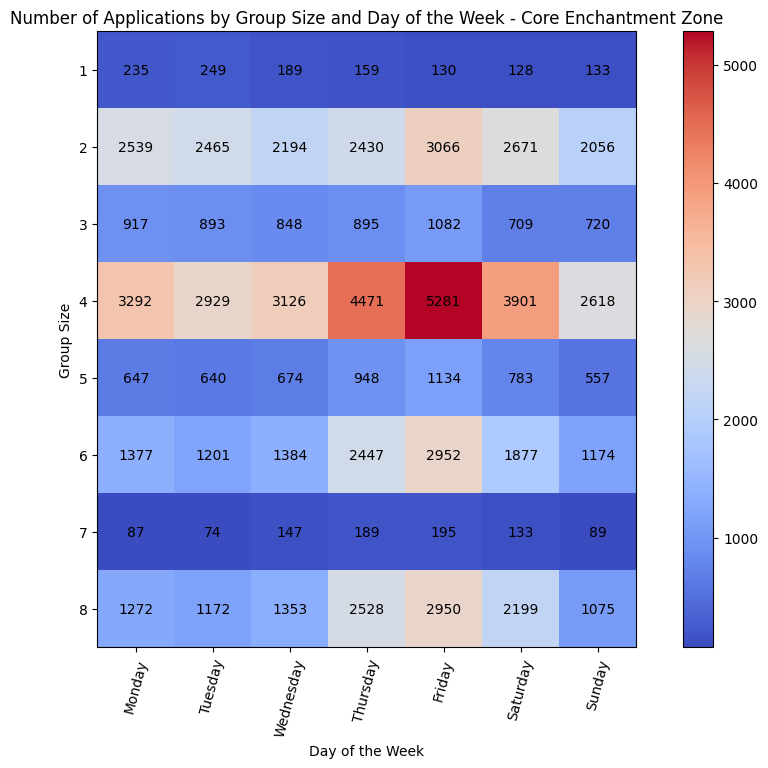

In [45]:
# Create a heatmap for the number of applications by group size and day of the week
# Group the data by group size and day of the week
df_group_day = df_split_core_zone.groupby(
    ["maximum_requested_group_size", "preferred_entry_date_day"]
)["preferred_entry_date_day"].count()

# Sort the group sizes in ascending order and the days of the week in chronological order
df_group_day = df_group_day.reindex(
    [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    level=1,
)

df_group_day = df_group_day.reindex(
    [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
    ],
    level=0,
)


# Unstack the data to create a matrix
df_group_day = df_group_day.unstack()

# Fill any missing values with 0
df_group_day.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(df_group_day, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

# Show the totals for each group size
for i in range(len(df_group_day.index)):
    for j in range(len(df_group_day.columns)):
        plt.text(j, i, df_group_day.iloc[i, j], ha="center", va="center", color="black")

plt.xticks(range(len(df_group_day.columns)), df_group_day.columns, rotation=75)

plt.yticks(range(len(df_group_day.index)), df_group_day.index)

plt.xlabel("Day of the Week")

plt.ylabel("Group Size")

plt.title(
    "Number of Applications by Group Size and Day of the Week - Core Enchantment Zone"
)

plt.show()

Clearly, Friday with a group size of four sees the most application entries.

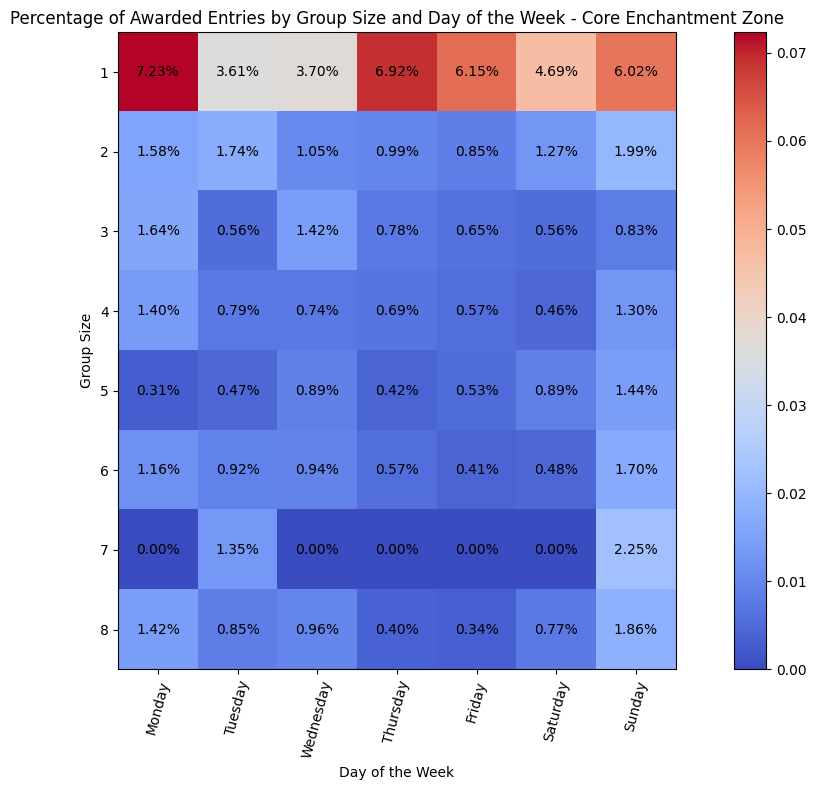

In [46]:
# Create a heatmap showing the percentage awarded by group size and day of the week
# Group the data by group size and day of the week
df_group_day_awarded = df_split_core_zone_awarded.groupby(
    ["maximum_requested_group_size", "preferred_entry_date_day"]
)["preferred_entry_date_day"].count()

# Sort the group sizes in ascending order
# Sort the group sizes in ascending order and the days of the week in chronological order
df_group_day_awarded = df_group_day_awarded.reindex(
    [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    level=1,
)

df_group_day_awarded = df_group_day_awarded.reindex(
    [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
    ],
    level=0,
)

# Unstack the data to create a matrix

df_group_day_awarded = df_group_day_awarded.unstack()

# Fill any missing values with 0
df_group_day_awarded.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(
    df_group_day_awarded / df_group_day, cmap="coolwarm", interpolation="nearest"
)

plt.colorbar()

# Show the totals for each group size
for i in range(len(df_group_day_awarded.index)):
    for j in range(len(df_group_day_awarded.columns)):
        plt.text(
            j,
            i,
            f"{df_group_day_awarded.iloc[i, j] / df_group_day.iloc[i, j]:.2%}",
            ha="center",
            va="center",
            color="black",
        )

plt.xticks(
    range(len(df_group_day_awarded.columns)), df_group_day_awarded.columns, rotation=75
)

plt.yticks(range(len(df_group_day_awarded.index)), df_group_day_awarded.index)

plt.xlabel("Day of the Week")

plt.ylabel("Group Size")

plt.title(
    "Percentage of Awarded Entries by Group Size and Day of the Week - Core Enchantment Zone"
)

# SAve the plot to a PNG file
plt.tight_layout()

plt.savefig("heatmap_group_day_awarded.png")

plt.show()

If there was every an upside to having no friends to backpacking with, it would be that getting a permit for the Core Enchantment Zone is easier if you're applying for a group size of 1.

## Combined Application Analysis

Taking a look at the five years of data can yield different results, removing some of the variation seen from year to year.

In [47]:
# Get the total awarded applications to total applications percentage for ALL years 2020-2024 by zone
# given the applicant applied for that zone

# Get a list of all the zones
zones_values = df_all["preferred_zone_1"].unique()

prob_awarded_zone_applied_for = []

# Loop over the zones and calculate the probability of being awarded a permit for each zone
for zone in zones_values:
    applied_1 = df_all["preferred_zone_1"] == zone
    applied_2 = df_all["preferred_zone_2"] == zone
    applied_3 = df_all["preferred_zone_3"] == zone

    zone_filter = applied_1 | applied_2 | applied_3

    applied_zone = df_all[zone_filter]

    total_zone = len(applied_zone)

    awarded_zone_filter = df_all["awarded_entrance_code_name"] == zone

    total_zone_awarded = len(df_all[zone_filter & awarded_zone_filter])
    prob_zone_awarded = total_zone_awarded / total_zone

    prob_awarded_zone_applied_for.append(
        [zone, prob_zone_awarded, total_zone_awarded, total_zone]
    )

    print(
        f"Probability of being awarded a permit for {zone}, given applied 1+ option in zone: {prob_zone_awarded:.2%} ({total_zone_awarded}/{total_zone})"
    )

df_prob_awarded_zone_applied_for_all = zone_probabilities_to_crosstab(
    prob_awarded_zone_applied_for,
    ["Zone", "Probability", "Total Awarded", "Total Applied"],
)

# Show crosstab of the new dataframe
df_prob_awarded_zone_applied_for_all


Probability of being awarded a permit for Colchuck Zone, given applied 1+ option in zone: 2.94% (1778/60538)
Probability of being awarded a permit for Core Enchantment Zone, given applied 1+ option in zone: 2.38% (3615/151959)
Probability of being awarded a permit for Snow Zone, given applied 1+ option in zone: 7.80% (3238/41492)
Probability of being awarded a permit for Eightmile/Caroline Zone (stock), given applied 1+ option in zone: 13.91% (128/920)
Probability of being awarded a permit for Stuart  Zone, given applied 1+ option in zone: 10.28% (2376/23109)
Probability of being awarded a permit for Eightmile/Caroline Zone, given applied 1+ option in zone: 14.62% (1475/10091)
Probability of being awarded a permit for Stuart Zone (stock), given applied 1+ option in zone: 9.98% (63/631)


,Zone,Probability,Total Awarded,Total Applied,Probability (%)
0,Eightmile/Caroline Zone,0.146170,1475,10091,14.62%
1,Eightmile/Caroline Zone (stock),0.139130,128,920,13.91%
2,Stuart Zone,0.102817,2376,23109,10.28%
3,Stuart Zone (stock),0.099842,63,631,9.98%
4,Snow Zone,0.078039,3238,41492,7.80%
5,Colchuck Zone,0.029370,1778,60538,2.94%
6,Core Enchantment Zone,0.023789,3615,151959,2.38%


/var/folders/qw/yqqx13kn74v_mjyknjykpm2h0000gn/T/ipykernel_11926/3860420073.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])


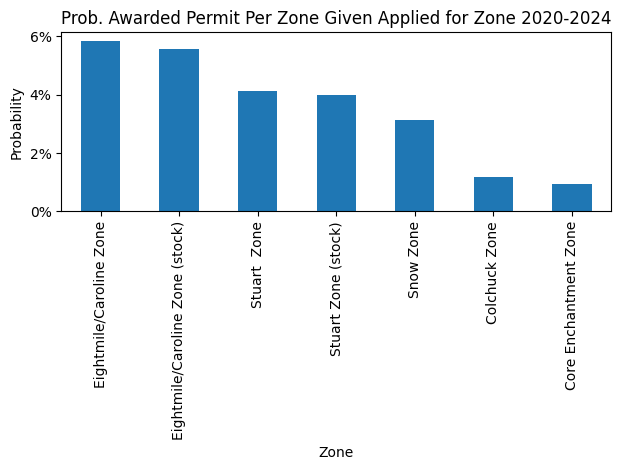

In [48]:
# Plot the cross tab as a bar chart
df_prob_awarded_zone_applied_for_all.set_index("Zone")["Probability"].plot(kind="bar")

plt.xlabel("Zone")

plt.ylabel("Probability")

# Show y axis as percentage
plt.gca().set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.gca().get_yticks()])

plt.title("Prob. Awarded Permit Per Zone Given Applied for Zone 2020-2024")

# Save the plot to a PNG file

plt.tight_layout()

plt.savefig("probability_awarded_permit_per_zone_all_years.png")

plt.show()

Historically, the best zones to apply for are the same as we saw in 2024.

In [49]:
import pandas as pd

# Import the combined_results.csv file
df_all_split = pd.read_csv(
    "../all/combined_results_split_actual.csv",
    # Import was failing to parse date columns, so I
    # to add the column names
    parse_dates=[
        "preferred_entry_date",
        "awarded_entry_date",
    ],
    date_format="%m-%d-%Y",  # Align format with export format
    na_filter=False,  # Do not convert 'N/A' to NaN
)

print(len(df_all_split))
df_all_split.head()

531085


,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,year,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day
0,Colchuck Zone,2020-06-26,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,June,Friday
1,Core Enchantment Zone,2020-08-01,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday
2,Core Enchantment Zone,2020-09-19,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,September,Saturday
3,Core Enchantment Zone,2020-08-22,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday
4,Snow Zone,2020-07-17,0,Awarded,1,2020-07-17,Snow Zone,6,0,,2020,True,1,July,Friday


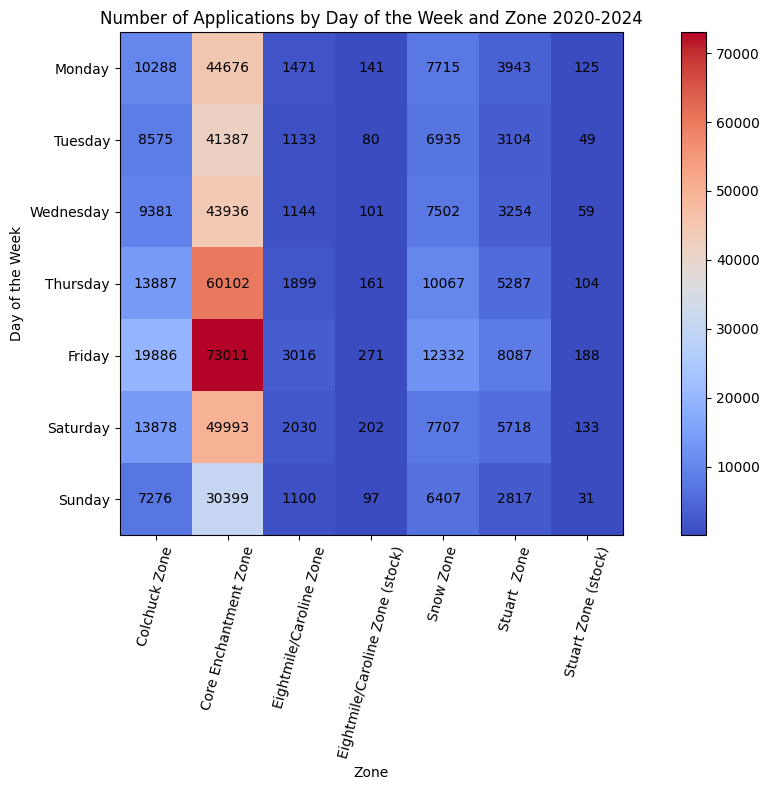

In [50]:
# Group the data by day of the week and zone
df_day_zone_all = df_all_split.groupby(["preferred_entry_date_day", "preferred_zone"])

# Count the number of entries for each group
df_day_zone_all = df_day_zone_all["preferred_zone"].count()

# Unstack the data to create a matrix
df_day_zone_all = df_day_zone_all.unstack()

# Fill any missing values with 0
df_day_zone_all.fillna(0, inplace=True)

# Sort the days of the week in chronological order
df_day_zone_all = df_day_zone_all.reindex(
    [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    axis=0,
)

# Create a heatmap
plt.figure(figsize=(12, 8))

plt.imshow(df_day_zone_all, cmap="coolwarm", interpolation="nearest")

plt.colorbar()

# Show the totals for each day of the week

for i in range(len(df_day_zone_all.index)):
    for j in range(len(df_day_zone_all.columns)):
        plt.text(
            j, i, df_day_zone_all.iloc[i, j], ha="center", va="center", color="black"
        )


plt.xticks(range(len(df_day_zone_all.columns)), df_day_zone_all.columns, rotation=75)

plt.yticks(range(len(df_day_zone_all.index)), df_day_zone_all.index)

plt.xlabel("Zone")

plt.ylabel("Day of the Week")

plt.title("Number of Applications by Day of the Week and Zone 2020-2024")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("heatmap_day_zone_all_years.png")

plt.show()


The heatmap above shows similar results to what we saw in 2024, but it makes it even more clear that Sunday, in the Core Enchantments see the lowest level of application entries BY FAR and it's an increased inventory day.

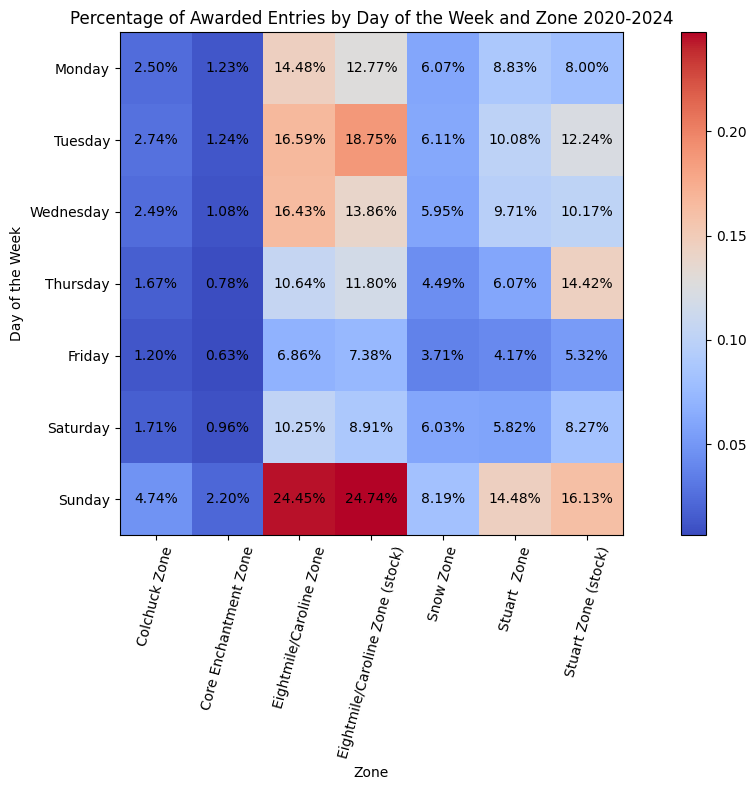

In [51]:
# Create the same heatmap as above but for the percentage awarded
# Group the data by day of the week and zone

df_day_zone_awarded_all = (
    df_all_split[
        (df_all_split["awarded"] == True)
        & (df_all_split["awarded_preference"] == df_all_split["preferred_option"])
    ]
    .groupby(["preferred_entry_date_day", "preferred_zone"])["preferred_zone"]
    .count()
)

# Unstack the data to create a matrix
df_day_zone_awarded_all = df_day_zone_awarded_all.unstack()

# Fill any missing values with 0
df_day_zone_awarded_all.fillna(0, inplace=True)

# Sort the days of the week in chronological order
df_day_zone_awarded_all = df_day_zone_awarded_all.reindex(
    [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    axis=0,
)

# Create a heatmap
plt.figure(figsize=(12, 8))

plt.imshow(
    df_day_zone_awarded_all / df_day_zone_all, cmap="coolwarm", interpolation="nearest"
)

plt.colorbar()

# Show the totals for each day of the week
for i in range(len(df_day_zone_awarded_all.index)):
    for j in range(len(df_day_zone_awarded_all.columns)):
        plt.text(
            j,
            i,
            f"{df_day_zone_awarded_all.iloc[i, j] / df_day_zone_all.iloc[i, j]:.2%}",
            ha="center",
            va="center",
            color="black",
        )

plt.xticks(
    range(len(df_day_zone_awarded_all.columns)),
    df_day_zone_awarded_all.columns,
    rotation=75,
)

plt.yticks(range(len(df_day_zone_awarded_all.index)), df_day_zone_awarded_all.index)

plt.xlabel("Zone")

plt.ylabel("Day of the Week")

plt.title("Percentage of Awarded Entries by Day of the Week and Zone 2020-2024")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("heatmap_day_zone_awarded_all_years.png")

plt.show()

The above heatmap is useful because people are sometimes unflexible on the month they can or want to backpack in. Therefore, this visualization just looks at the best percentages for being awarded based on the zones and days over the past five years.

But it includes too many variable changes. The lottery changed in 2024 with the addition of increased inventory on Monday so I think looking at this heatmap just for 2024 provides a better picture going forward.

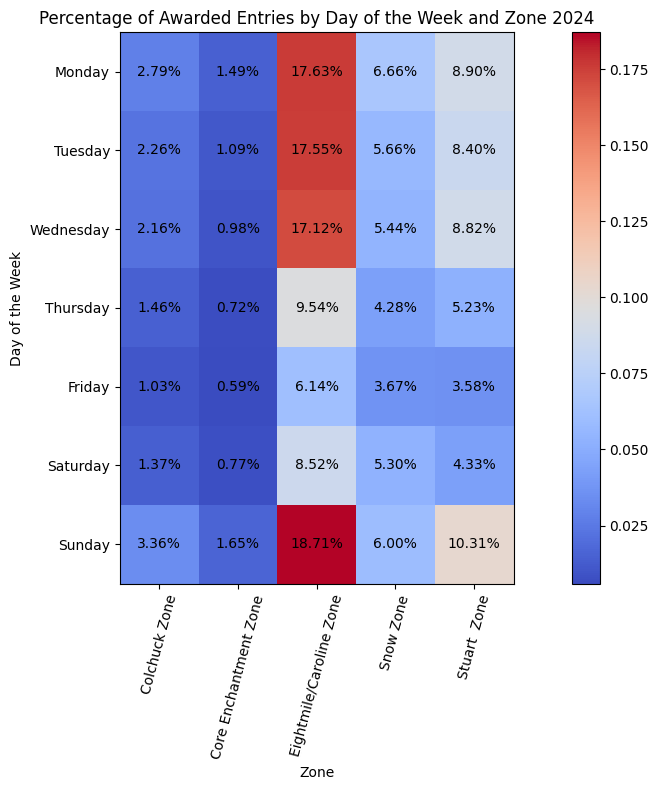

In [52]:
# Create the same heat map above but only for 2024 using df_split
# Group the data by day of the week and zone
df_day_zone_awarded = (
    df_split[
        (df_split["awarded"] == True)
        & (df_split["awarded_preference"] == df_split["preferred_option"])
    ]
    .groupby(["preferred_entry_date_day", "preferred_division"])["preferred_division"]
    .count()
)

# Unstack the data to create a matrix
df_day_zone_awarded = df_day_zone_awarded.unstack()

# Fill any missing values with 0
df_day_zone_awarded.fillna(0, inplace=True)

# Sort the days of the week in chronological order
df_day_zone_awarded = df_day_zone_awarded.reindex(
    [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    axis=0,
)

# Create a heatmap
plt.figure(figsize=(12, 8))

plt.imshow(df_day_zone_awarded / df_day_zone, cmap="coolwarm", interpolation="nearest")

plt.colorbar()

# Show the totals for each day of the week
for i in range(len(df_day_zone_awarded.index)):
    for j in range(len(df_day_zone_awarded.columns)):
        plt.text(
            j,
            i,
            f"{df_day_zone_awarded.iloc[i, j] / df_day_zone.iloc[i, j]:.2%}",
            ha="center",
            va="center",
            color="black",
        )

plt.xticks(
    range(len(df_day_zone_awarded.columns)), df_day_zone_awarded.columns, rotation=75
)

plt.yticks(range(len(df_day_zone_awarded.index)), df_day_zone_awarded.index)

plt.xlabel("Zone")

plt.ylabel("Day of the Week")

plt.title("Percentage of Awarded Entries by Day of the Week and Zone 2024")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("heatmap_day_zone_awarded_2024.png")

plt.show()

### Labor Day

Looking at the lottery over the past five years let's us run some fun analyses. For example, we can look at Labor Day weekend over the past five years to see if it's a good or bad weekend to apply compared to other weekends during "peak season".

In [53]:
# Add an additional column to the df_split_all dataframe for day of the month
df_all_split["preferred_entry_date_day_of_month"] = df_all_split[
    "preferred_entry_date"
].dt.day

# Add an additional column to the df_split_all dataframe what weekend the day falls on
# whether it's the 1 or 2 weekend of the month
df_all_split["preferred_entry_date_weekend"] = (
    df_all_split["preferred_entry_date_day_of_month"] // 7 + 1
)

# Remove all entries that are not on a Friday, Saturday, and Sunday
weekend_filter = df_all_split["preferred_entry_date_day"].isin(
    ["Friday", "Saturday", "Sunday"]
)

df_all_split_weekend = df_all_split[weekend_filter]

df_all_split_weekend

,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,year,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day,preferred_entry_date_day_of_month,preferred_entry_date_weekend
0,Colchuck Zone,2020-06-26,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,June,Friday,26,4
1,Core Enchantment Zone,2020-08-01,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday,1,1
2,Core Enchantment Zone,2020-09-19,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,September,Saturday,19,3
3,Core Enchantment Zone,2020-08-22,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday,22,4
4,Snow Zone,2020-07-17,0,Awarded,1,2020-07-17,Snow Zone,6,0,,2020,True,1,July,Friday,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531071,Snow Zone,2024-10-12,3,Unsuccessful,0,1970-01-01,,0,0,,2024,False,3,October,Saturday,12,2
531073,Colchuck Zone,2024-06-08,2,Unsuccessful,0,1970-01-01,,0,0,,2024,False,3,June,Saturday,8,2
531075,Colchuck Zone,2024-07-06,2,Accepted,1,2024-10-26,Colchuck Zone,2,0,,2024,False,3,July,Saturday,6,1
531076,Colchuck Zone,2024-10-27,4,Accepted,1,2024-10-26,Core Enchantment Zone,4,0,,2024,False,3,October,Sunday,27,4


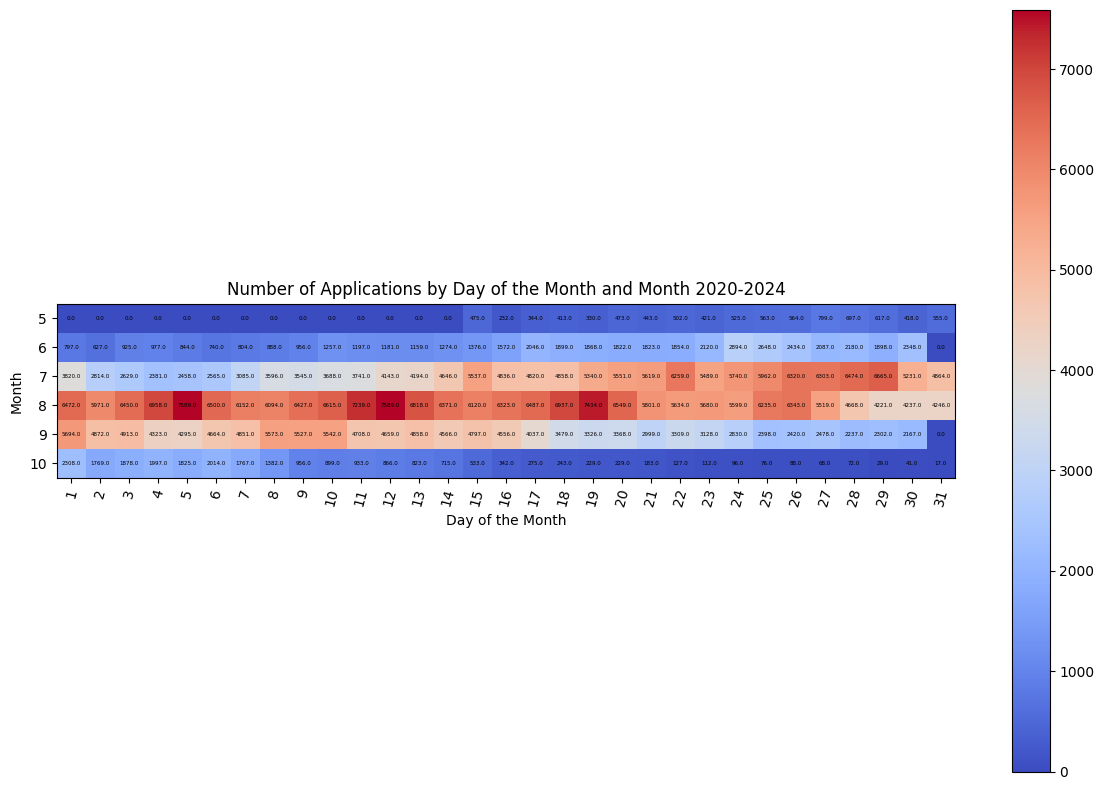

In [54]:
# Chart the entries by date from May 15th to October 31th over the five years ignoring the year
# Sort the data by date
df_split_all = df_all_split.sort_values("preferred_entry_date")

# Group the values by month value and day of the month values
df_date = df_split_all.groupby(
    [
        df_all_split["preferred_entry_date"].dt.month,
        df_all_split["preferred_entry_date"].dt.day,
    ]
)["preferred_entry_date"].count()

# Unstack the data to create a matrix
df_date = df_date.unstack()

# Fill any missing values with 0
df_date.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))

plt.imshow(df_date, cmap="coolwarm", interpolation="nearest")

plt.colorbar()

# Show the totals for each day of the month
for i in range(len(df_date.index)):
    for j in range(len(df_date.columns)):
        plt.text(
            j,
            i,
            df_date.iloc[i, j],
            ha="center",
            va="center",
            color="black",
            fontsize=4,
        )

plt.xticks(range(len(df_date.columns)), df_date.columns, rotation=75)

plt.yticks(range(len(df_date.index)), df_date.index)

plt.xlabel("Day of the Month")

plt.ylabel("Month")

plt.title("Number of Applications by Day of the Month and Month 2020-2024")

# Save the plot to a PNG file
plt.tight_layout()

plt.savefig("heatmap_peak_season.png")

plt.show()

The above heat map is little tough to read. There may be a different way to get a value for peak season.

In [55]:
applications_per_day_above_4000 = df_date[df_date > 4000]

# Get the first value that is not NaN
beginning_of_peak_season = applications_per_day_above_4000.iloc[2]  # July

# Get the last value that is not NaN
end_of_peak_season = applications_per_day_above_4000.iloc[4]  # September

# Print those combinations of values
beginning_of_peak_season


preferred_entry_date
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    4143.0
13    4194.0
14    4646.0
15    5537.0
16    4836.0
17    4820.0
18    4858.0
19    5340.0
20    5551.0
21    5619.0
22    6259.0
23    5489.0
24    5740.0
25    5962.0
26    6320.0
27    6303.0
28    6474.0
29    6665.0
30    5231.0
31    4864.0
Name: 7, dtype: float64

In [56]:
end_of_peak_season

preferred_entry_date
1     5694.0
2     4872.0
3     4913.0
4     4323.0
5     4295.0
6     4664.0
7     4851.0
8     5573.0
9     5527.0
10    5542.0
11    4708.0
12    4659.0
13    4858.0
14    4566.0
15    4797.0
16    4556.0
17    4037.0
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
Name: 9, dtype: float64

The two values determined to start the peak season and end the peak season, based on application entries per day above are:

- July 12 (start)
- September 17 (end)

In [57]:
# Start of peak season July 12
# End of peak season Septemeber 17

# Filter the data to only include the peak season based on month and day
peak_season_filter = (
    (df_all_split["preferred_entry_date"].dt.month == 7)
    & (df_all_split["preferred_entry_date"].dt.day >= 12)
) | (
    (df_all_split["preferred_entry_date"].dt.month == 9)
    & (df_all_split["preferred_entry_date"].dt.day <= 17)
    | (df_all_split["preferred_entry_date"].dt.month == 8)
)

df_peak_season = df_all_split[peak_season_filter]

# Filter the data for only Friday, Saturday, and Sunday
weekend_filter = df_peak_season["preferred_entry_date_day"].isin(
    ["Friday", "Saturday", "Sunday"]
)

df_peak_season = df_peak_season[weekend_filter]

df_peak_season


,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,year,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day,preferred_entry_date_day_of_month,preferred_entry_date_weekend
1,Core Enchantment Zone,2020-08-01,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday,1,1
3,Core Enchantment Zone,2020-08-22,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday,22,4
4,Snow Zone,2020-07-17,0,Awarded,1,2020-07-17,Snow Zone,6,0,,2020,True,1,July,Friday,17,3
7,Eightmile/Caroline Zone (stock),2020-09-05,0,Awarded,1,2020-09-05,Eightmile/Caroline Zone (stock),6,0,,2020,True,1,September,Saturday,5,1
8,Core Enchantment Zone,2020-08-01,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531025,Colchuck Zone,2024-08-17,4,Unsuccessful,0,1970-01-01,,0,0,,2024,False,3,August,Saturday,17,3
531027,Colchuck Zone,2024-08-03,5,Unsuccessful,0,1970-01-01,,0,0,,2024,False,3,August,Saturday,3,1
531038,Core Enchantment Zone,2024-09-08,8,Unsuccessful,0,1970-01-01,,0,0,,2024,False,3,September,Sunday,8,2
531063,Core Enchantment Zone,2024-09-06,6,Accepted,1,2024-10-24,Colchuck Zone,6,0,,2024,False,3,September,Friday,6,1


In [58]:
# Create a column whether the day is part of Labor Day Weekend for each of the years
# Labor Day 2020 Weekend was Sept 4-6 for Friday, Satuday, Sunday
# Labor Day 2021 Weekend was Sept 3-5 for Friday, Satuday, Sunday
# Labor Day 2022 Weekend was Sept 2-4 for Friday, Satuday, Sunday
# Labor Day 2023 Weekend was Sept 1-3 for Friday, Satuday, Sunday
# Labor Day 2024 Weekend was Aug 30-Sept 1 for Friday, Satuday, Sunday

# Create a column for Labor Day Weekend
labor_day_weekend_filter_2020 = (
    (df_peak_season["preferred_entry_date"].dt.month == 9)
    & (df_peak_season["preferred_entry_date"].dt.day >= 4)
    & (df_peak_season["preferred_entry_date"].dt.day <= 6)
    & (df_peak_season["year"] == 2020)
)

labor_day_weekend_filter_2021 = (
    (df_peak_season["preferred_entry_date"].dt.month == 9)
    & (df_peak_season["preferred_entry_date"].dt.day >= 3)
    & (df_peak_season["preferred_entry_date"].dt.day <= 5)
    & (df_peak_season["year"] == 2021)
)

labor_day_weekend_filter_2022 = (
    (df_peak_season["preferred_entry_date"].dt.month == 9)
    & (df_peak_season["preferred_entry_date"].dt.day >= 2)
    & (df_peak_season["preferred_entry_date"].dt.day <= 4)
    & (df_peak_season["year"] == 2022)
)

labor_day_weekend_filter_2023 = (
    (df_peak_season["preferred_entry_date"].dt.month == 9)
    & (df_peak_season["preferred_entry_date"].dt.day >= 1)
    & (df_peak_season["preferred_entry_date"].dt.day <= 3)
    & (df_peak_season["year"] == 2023)
)

labor_day_weekend_filter_2024 = (
    (df_peak_season["preferred_entry_date"].dt.month == 8)
    & (df_peak_season["preferred_entry_date"].dt.day >= 30)
    & (df_peak_season["preferred_entry_date"].dt.day <= 1)
    & (df_peak_season["year"] == 2024)
)

# Add a column for Labor Day Weekend True is it's labor day weekend and false if it isn't
df_peak_season["Labor Day Weekend"] = (
    labor_day_weekend_filter_2020
    | labor_day_weekend_filter_2021
    | labor_day_weekend_filter_2022
    | labor_day_weekend_filter_2023
    | labor_day_weekend_filter_2024
)

df_peak_season

,preferred_zone,preferred_entry_date,minimum_acceptable_group_size,results_status,awarded_preference,awarded_entry_date,awarded_entrance_code_name,awarded_group_size,processing_sequence,state,year,awarded,preferred_option,preferred_entry_date_month,preferred_entry_date_day,preferred_entry_date_day_of_month,preferred_entry_date_weekend,Labor Day Weekend
1,Core Enchantment Zone,2020-08-01,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday,1,1,False
3,Core Enchantment Zone,2020-08-22,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday,22,4,False
4,Snow Zone,2020-07-17,0,Awarded,1,2020-07-17,Snow Zone,6,0,,2020,True,1,July,Friday,17,3,False
7,Eightmile/Caroline Zone (stock),2020-09-05,0,Awarded,1,2020-09-05,Eightmile/Caroline Zone (stock),6,0,,2020,True,1,September,Saturday,5,1,True
8,Core Enchantment Zone,2020-08-01,0,Unsuccessful,0,1970-01-01,,0,0,,2020,False,1,August,Saturday,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531025,Colchuck Zone,2024-08-17,4,Unsuccessful,0,1970-01-01,,0,0,,2024,False,3,August,Saturday,17,3,False
531027,Colchuck Zone,2024-08-03,5,Unsuccessful,0,1970-01-01,,0,0,,2024,False,3,August,Saturday,3,1,False
531038,Core Enchantment Zone,2024-09-08,8,Unsuccessful,0,1970-01-01,,0,0,,2024,False,3,September,Sunday,8,2,False
531063,Core Enchantment Zone,2024-09-06,6,Accepted,1,2024-10-24,Colchuck Zone,6,0,,2024,False,3,September,Friday,6,1,False


In [59]:
# Split the dataframe into labor day weekend and non labor day weekend
ld_filter = df_peak_season["Labor Day Weekend"] == True
df_peak_season_labor_day = df_peak_season[ld_filter]

df_peak_season_non_labor_day = df_peak_season[~ld_filter]

# Get the total number of applications for labor day weekend and non labor day weekend
total_applications_labor_day = len(df_peak_season_labor_day)

total_applications_non_labor_day = len(df_peak_season_non_labor_day)

# Get the total number of awarded applications for labor day weekend and non labor day weekend
total_awarded_labor_day = len(
    df_peak_season_labor_day[df_peak_season_labor_day["awarded"] == True]
)

total_awarded_non_labor_day = len(
    df_peak_season_non_labor_day[df_peak_season_non_labor_day["awarded"] == True]
)

# Get the percentage awarded for labor day weekend and non labor day weekend
percentage_awarded_labor_day = total_awarded_labor_day / total_applications_labor_day

percentage_awarded_non_labor_day = (
    total_awarded_non_labor_day / total_applications_non_labor_day
)

# Print the results
print(f"Total Applications Labor Day Weekend: {total_applications_labor_day}")
print(f"Total Applications Non Labor Day Weekend: {total_applications_non_labor_day}")


print(f"Total Awarded Labor Day Weekend: {total_awarded_labor_day}")
print(f"Total Awarded Non Labor Day Weekend: {total_awarded_non_labor_day}")

print(f"Percentage Awarded Labor Day Weekend: {percentage_awarded_labor_day:.2%}")
print(
    f"Percentage Awarded Non Labor Day Weekend: {percentage_awarded_non_labor_day:.2%}"
)

Total Applications Labor Day Weekend: 12382
Total Applications Non Labor Day Weekend: 156775
Total Awarded Labor Day Weekend: 200
Total Awarded Non Labor Day Weekend: 2228
Percentage Awarded Labor Day Weekend: 1.62%
Percentage Awarded Non Labor Day Weekend: 1.42%


In [ ]:
# 1. Identify null and alternative hypotheses
# Null Hypothesis: The proportion of awarded applications is the same for Labor Day Weekend and Non Labor Day Weekend
# Alternative Hypothesis: The proportion of awarded applications is different for Labor Day Weekend and Non Labor Day Weekend

# 2. Calculate the expected frequencies for the two groups
overall_proportion = (total_awarded_labor_day + total_awarded_non_labor_day) / (
    total_applications_labor_day + total_applications_non_labor_day
)

expected_labor_day = total_applications_labor_day * overall_proportion
expected_non_labor_day = total_applications_non_labor_day * overall_proportion

# 3. Calculate the chi-squared statistic
chi_squared = (
    total_awarded_labor_day - expected_labor_day
) ** 2 / expected_labor_day + (
    total_awarded_non_labor_day - expected_non_labor_day
) ** 2 / expected_non_labor_day

# 4. Determine the chi-square critical value
dof = 2 - 1

chi_squared_critical = 3.841

# 5. Compare the test statistic to the critical value
if chi_squared > chi_squared_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# 6. Determine the p-value
from scipy.stats import chi2

p_value = 1 - chi2.cdf(chi_squared, dof)

print(f"P-Value: {p_value}")


Fail to reject the null hypothesis
P-Value: 0.0826402133551506


Despite the percentage of awarded permits being higher for Labor Day Weekend compared to other weekends in the "peak season" the difference in awarded population proportions is not significant. Therefore, we fail to reject the null hypothesis that there is no difference in awarded permits between Labor Day Weekend and other weekends in the peak season.